# Regression Task - Diamond Sales Prices

There was a discussion organized related to the business understanding. The use case of predicting a diamond sales price was identified as a proper use case, which can bring a value. Then, observation unit was defined (a diamond with certain characteristcs). Afterwards, all permissions to access and process data were obtained. The dataset is without information that could provide personal identification.

## 1. Dataset Information
  
Explanation of the variables from the dataset taken directly from the [dataset source](https://www.kaggle.com/datasets/shivam2503/diamonds):

### Diamonds's attributes:
- `carat` weight of the diamond (0.2-5.01)
- `cut` quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- `color` diamond colour, from J (worst) to D (best)
- `clarity` a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- `x` length in mm (0-10.74)
- `y` width in mm (0-58.9)
- `z` depth in mm (0-31.8)
- `depth` total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43-79)
- `table` width of top of diamond relative to widest point (43-95)

### Output variable (desired target):
- `price` price in US dollars (326-18,823)

## 2. Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import zipfile

import warnings
warnings.filterwarnings('ignore')                                            # to ignore warnings related to deprecated pandas

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## 3. Loading Dataset and Distinguish Attributes

#### 3.1. Visually inspecting the dataset

In [2]:
# zf = zipfile.ZipFile('Data/diamonds.zip')                                                          # if zipped file is accessed
# df_raw = pd.read_csv(zf.open('diamonds.csv'), index_col=0)                                         # if zipped file is accessed
df_raw = pd.read_csv('diamonds.csv', index_col=0)

In [3]:
df = df_raw.copy()

In [4]:
df.shape

(53940, 10)

In [5]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [6]:
df.tail()

carat        cut color clarity  depth  table  price     x     y     z
53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

#### 3.2. Checking columns and data types

In [7]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


#### 3.3. Checking basic statistics - first info on distributions

In [8]:
df.describe()                                                                                     # for numerical variables

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

<mark><u>**Insights**</u></mark>: Variables x, y and z represent dimensions of a diamond. Min value of 0 is not logical since it means that there are diamonds looking as an extremely thin surface (two dimensions) or even with one dimension. These values represent errors so they will be discarded (imputation of, for example, mean values does not make much sense).  

In [9]:
df = df[(df['x']!=0)]
df = df[(df['y']!=0)]
df = df[(df['z']!=0)]

In [10]:
df.describe()

carat         depth         table         price             x  \
count  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000   
mean       0.797698     61.749514     57.456834   3930.993231      5.731627   
std        0.473795      1.432331      2.234064   3987.280446      1.119423   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5323.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53920.000000  53920.000000  
mean       5.734887      3.540046  
std        1.140126      0.702530  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [11]:
df.describe(include='object')                                                                   # for categorical variables

cut  color clarity
count   53920  53920   53920
unique      5      7       8
top     Ideal      G     SI1
freq    21548  11284   13063

## 4. Checking for missing values and duplicate data

In [12]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<mark><u>**Insights**</u></mark>: It seems that there are no missing values, but this will be explored a bit more, to confirm.

In [13]:
for col in df_raw.columns:                                              # check for wrong entries like symbols -, ?, #, *, etc.
    print('{} : {}'.format(col, df[col].unique()))

carat : [0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.04 2.12
 1.77 2.5  1.8  1.67 1.84 2.2  3.01 1.88 2.33 2.68 2.34 1.9  2.16 2.74
 

<mark><u>**Insights**</u></mark>: It seems that here are no null values in the dataset (represented in the form of ‘?’ since Pandas does not recognize them). To confirm, they will be replaced with [`np.nan`] (if they exist):

In [14]:
for col in df_raw.columns:
    df[col].replace({'?': np.nan}, inplace=True)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [15]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

<mark><u>**Insights**</u></mark>: This confirms that there are no missing values in the dataset.

In [16]:
df.duplicated().sum()

145

In [17]:
df[df.duplicated()]

carat    cut color clarity  depth  table  price     x     y     z
1006    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1007    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1008    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
1009    0.79  Ideal     G     SI1   62.3   57.0   2898  5.90  5.85  3.66
2026    1.52   Good     E      I1   57.3   58.0   3105  7.53  7.42  4.28
...      ...    ...   ...     ...    ...    ...    ...   ...   ...   ...
47297   0.30   Good     J     VS1   63.4   57.0    394  4.23  4.26  2.69
47970   0.52  Ideal     D     VS2   61.8   55.0   1919  5.19  5.16  3.20
49327   0.51  Ideal     F    VVS2   61.2   56.0   2093  5.17  5.19  3.17
50080   0.51  Ideal     F    VVS2   61.2   56.0   2203  5.19  5.17  3.17
52862   0.50   Fair     E     VS2   79.0   73.0   2579  5.21  5.18  4.09

[145 rows x 10 columns]

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

0

<mark><u>**Insights**</u></mark>: This confirms that there are no duplicated rows in the dataset anymore.

## 5. Checking Data Distributions

#### 5.1. Univariate analysis

In [20]:
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [21]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

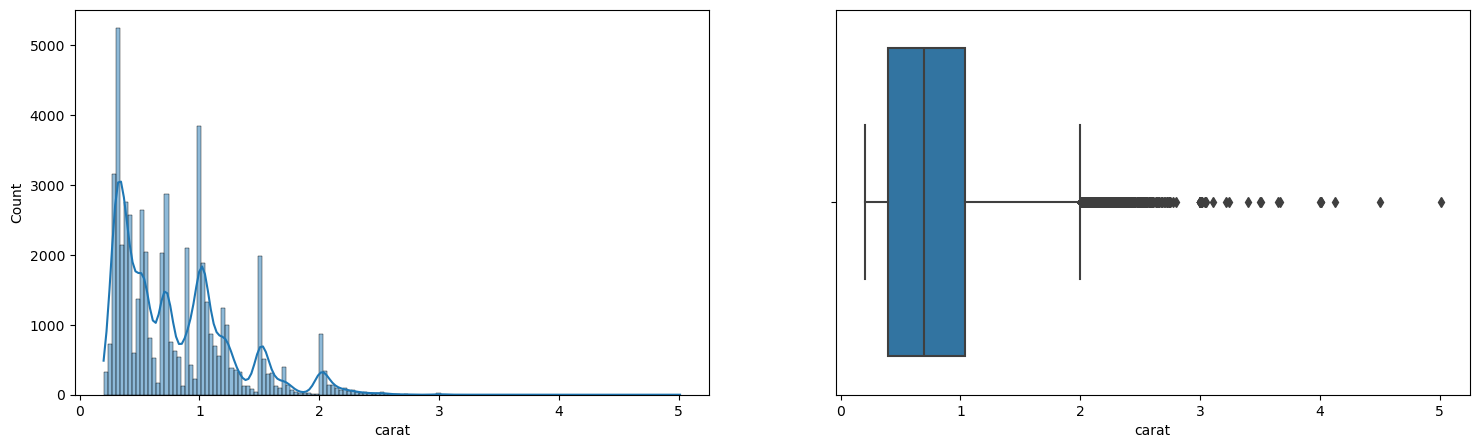

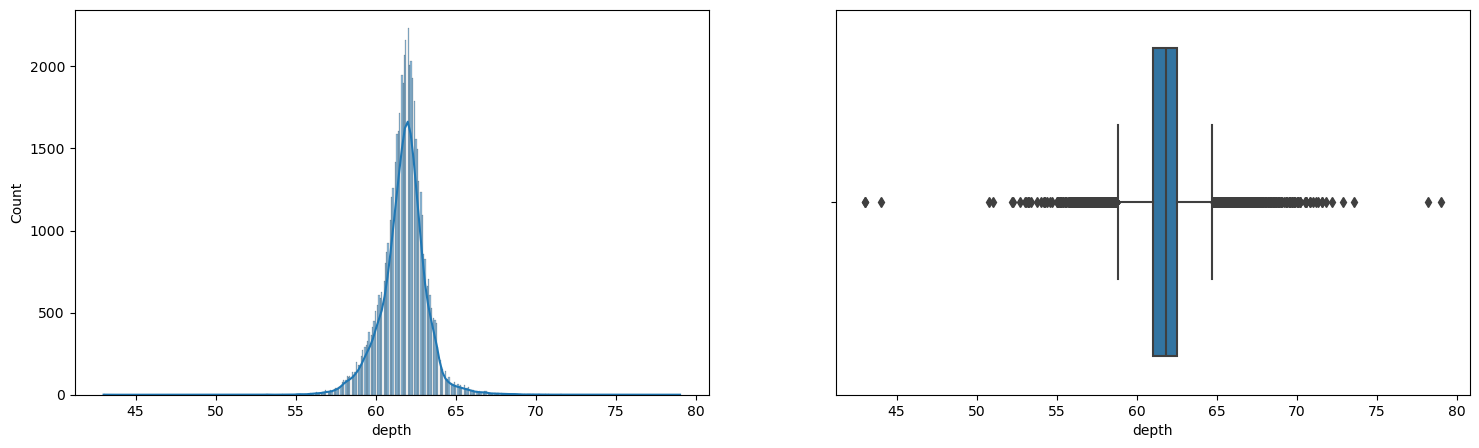

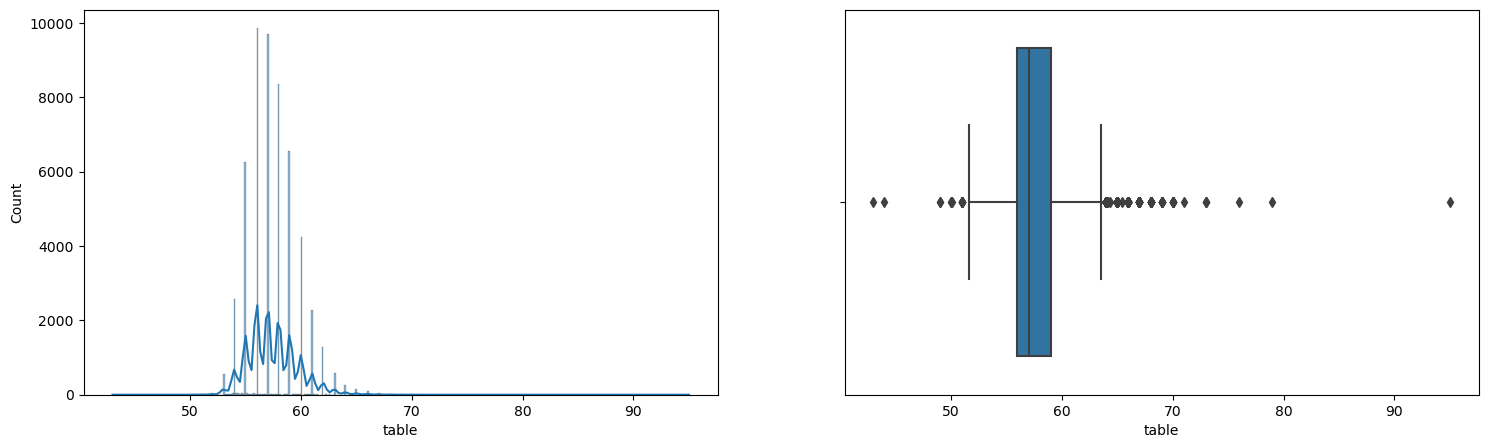

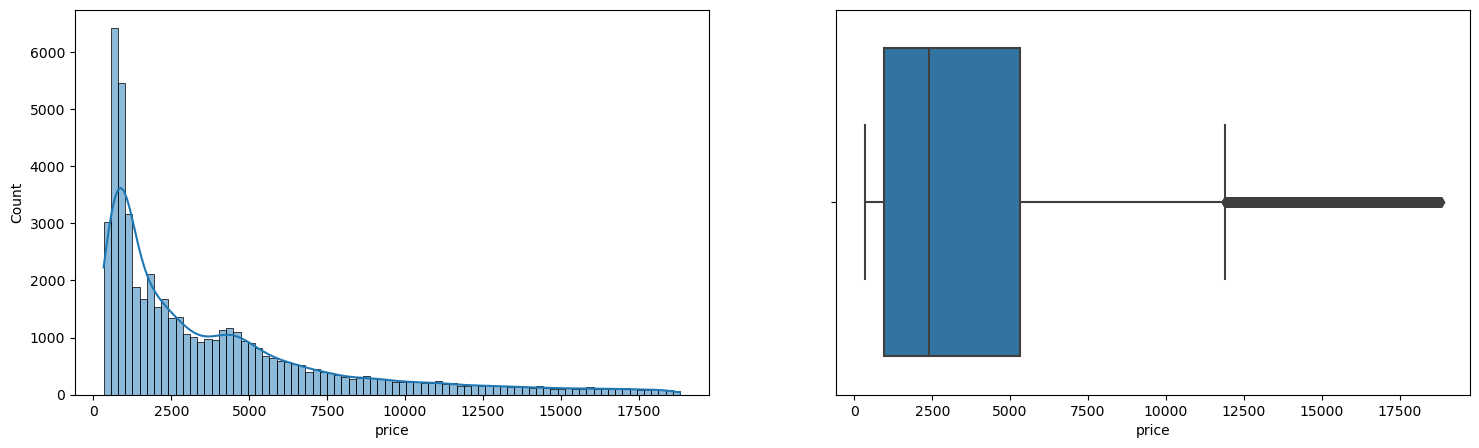

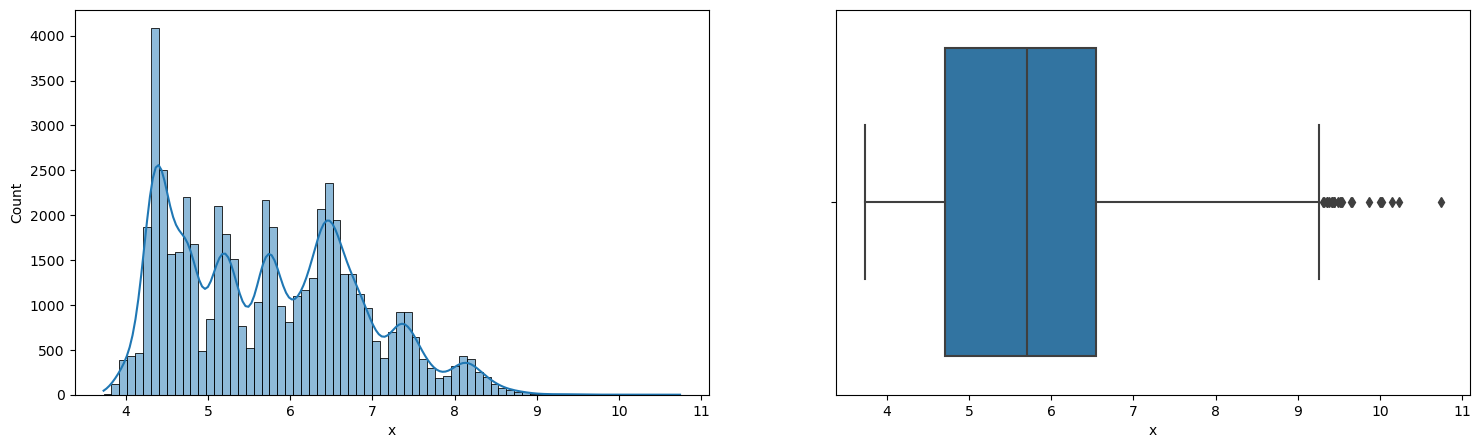

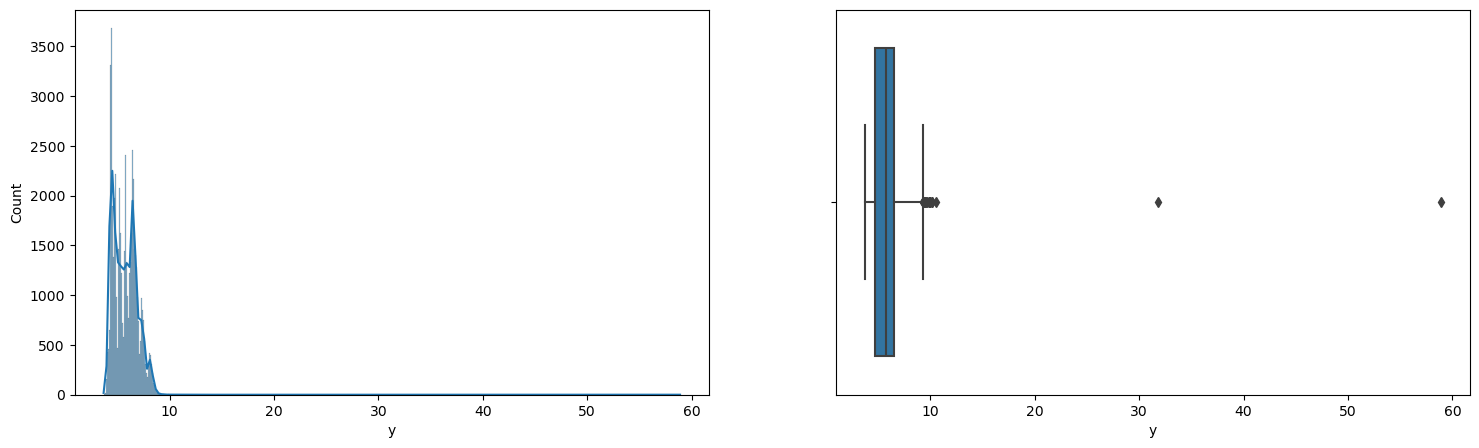

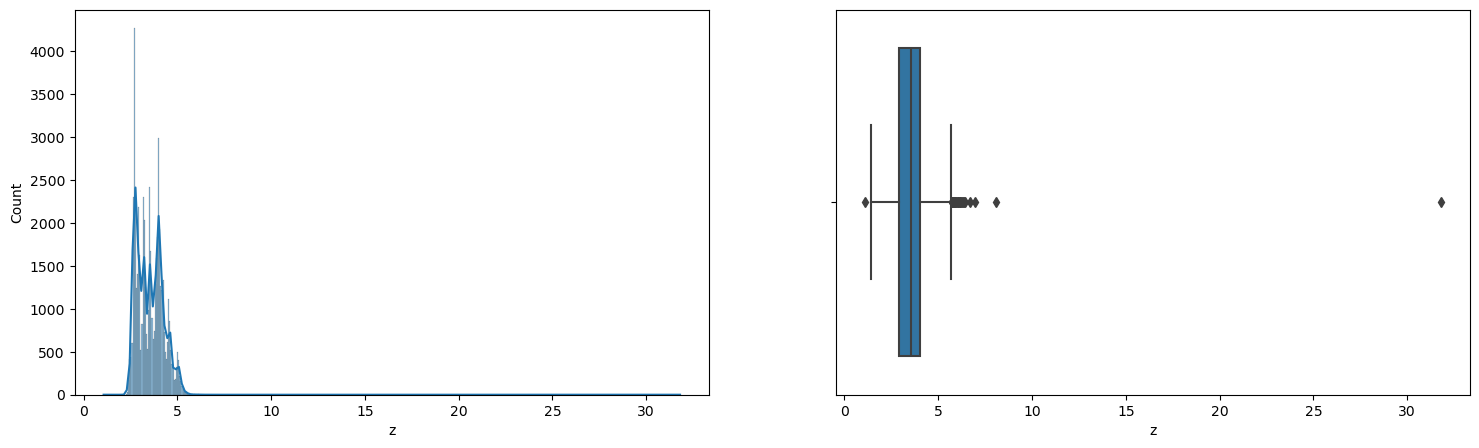

In [22]:
for col in numeric_cols:
    plt.figure(figsize=(18, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=col, data=df)
    plt.show()

<mark><u>**Insights**</u></mark>: There are outliers that should be eliminated after a deeper analysis that follows. 

#### 5.1.1. Analizing distributions of numerical variables

In [23]:
# set the style for the plots
sns.set_style("darkgrid")

#### Distribution of "carat" variable

<Figure size 800x1200 with 0 Axes>

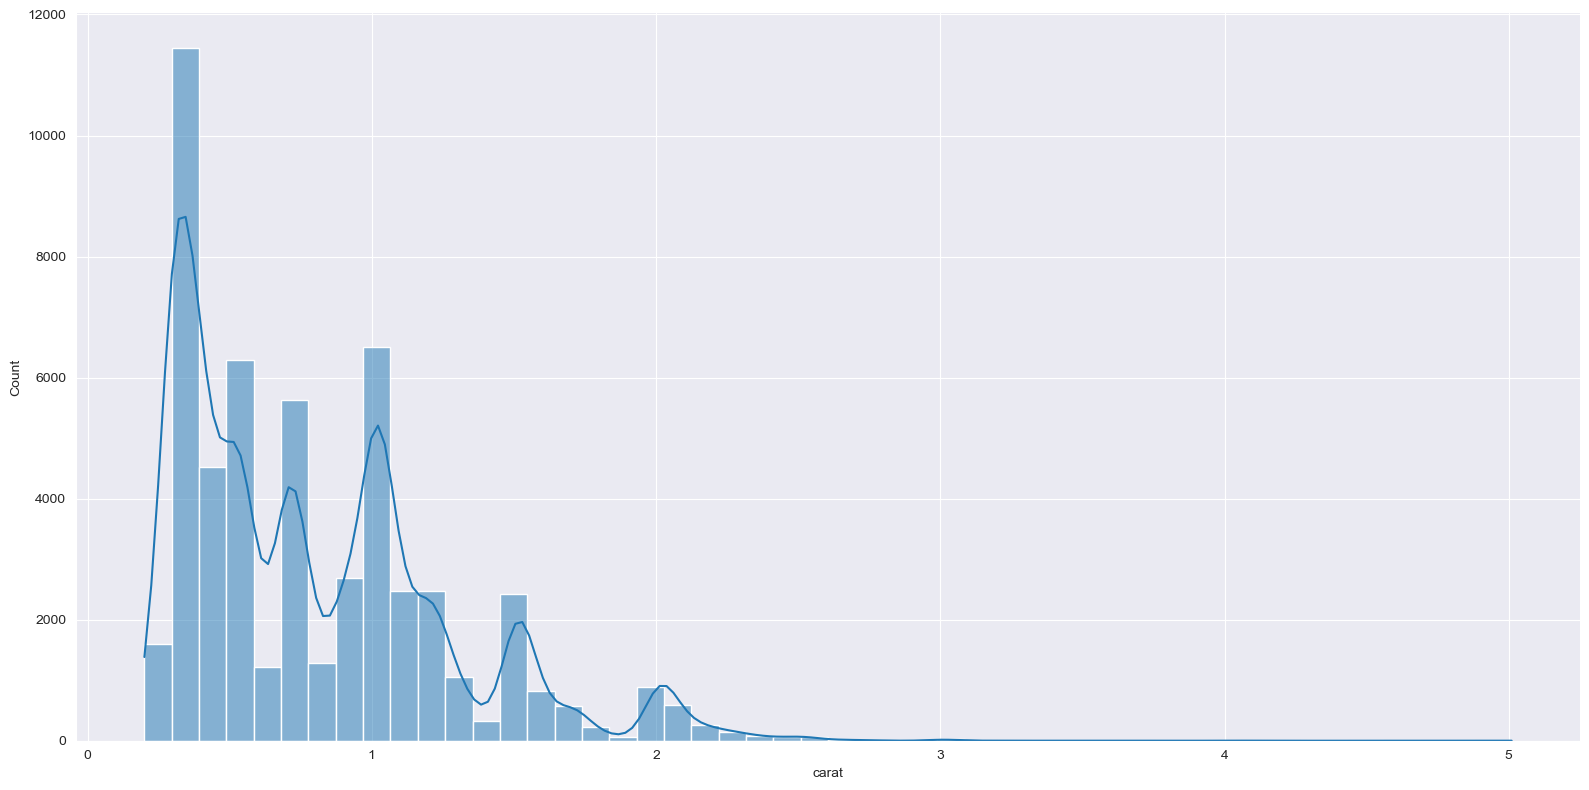

In [24]:
plt.figure(figsize=(8, 12))
sns.displot(df['carat'], kde=True, bins=50, height=8, aspect=2);

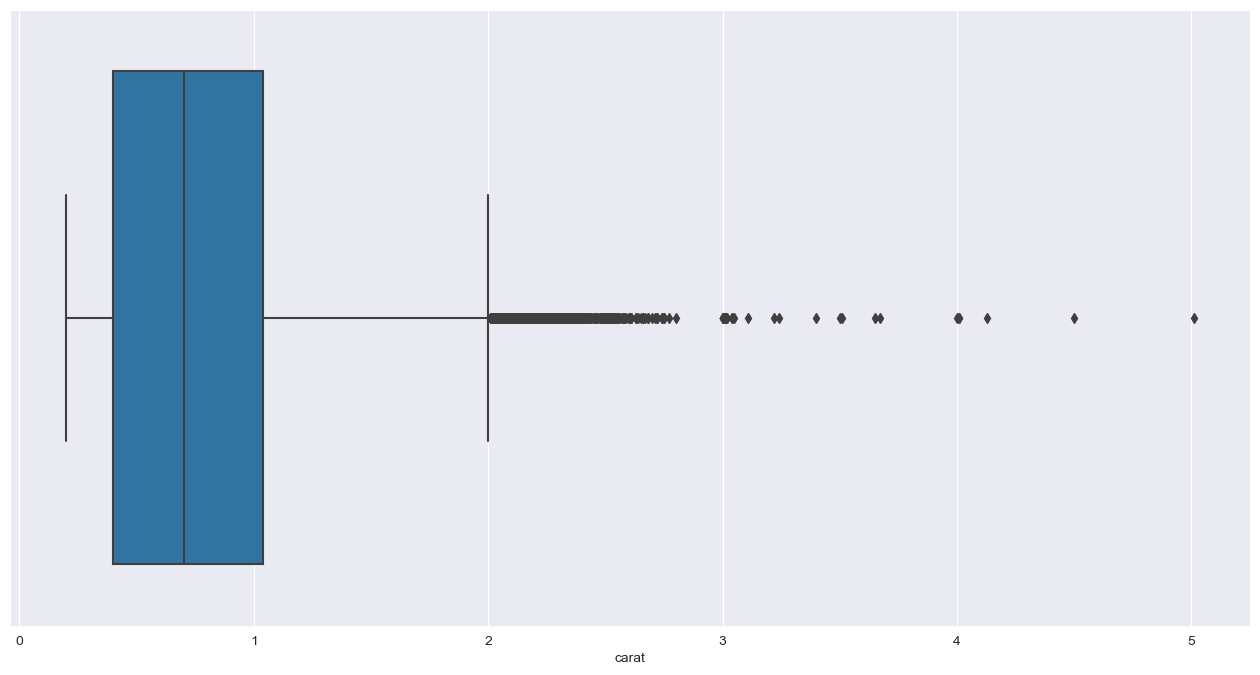

In [25]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x='carat', data=df, ax=ax);

In [26]:
df['carat'].describe()

count    53775.000000
mean         0.797536
std          0.473169
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

<mark><u>**Insights**</u></mark>: Distribution of carats is right skewed. Min carat is 0.2 and the middle 50% values (IQR) fall between 0.4 (1st quartile) and 1.04 (3rd quartile). The value defined with 1.5xIQR sets the max boundary to 1.04+1.5x(1.04-0.4)=2, above which the carats could be treated as unusual or rare. It can be seen that there are lot of carats above this boundary.

#### Distribution of "depth" variable

<Figure size 800x1200 with 0 Axes>

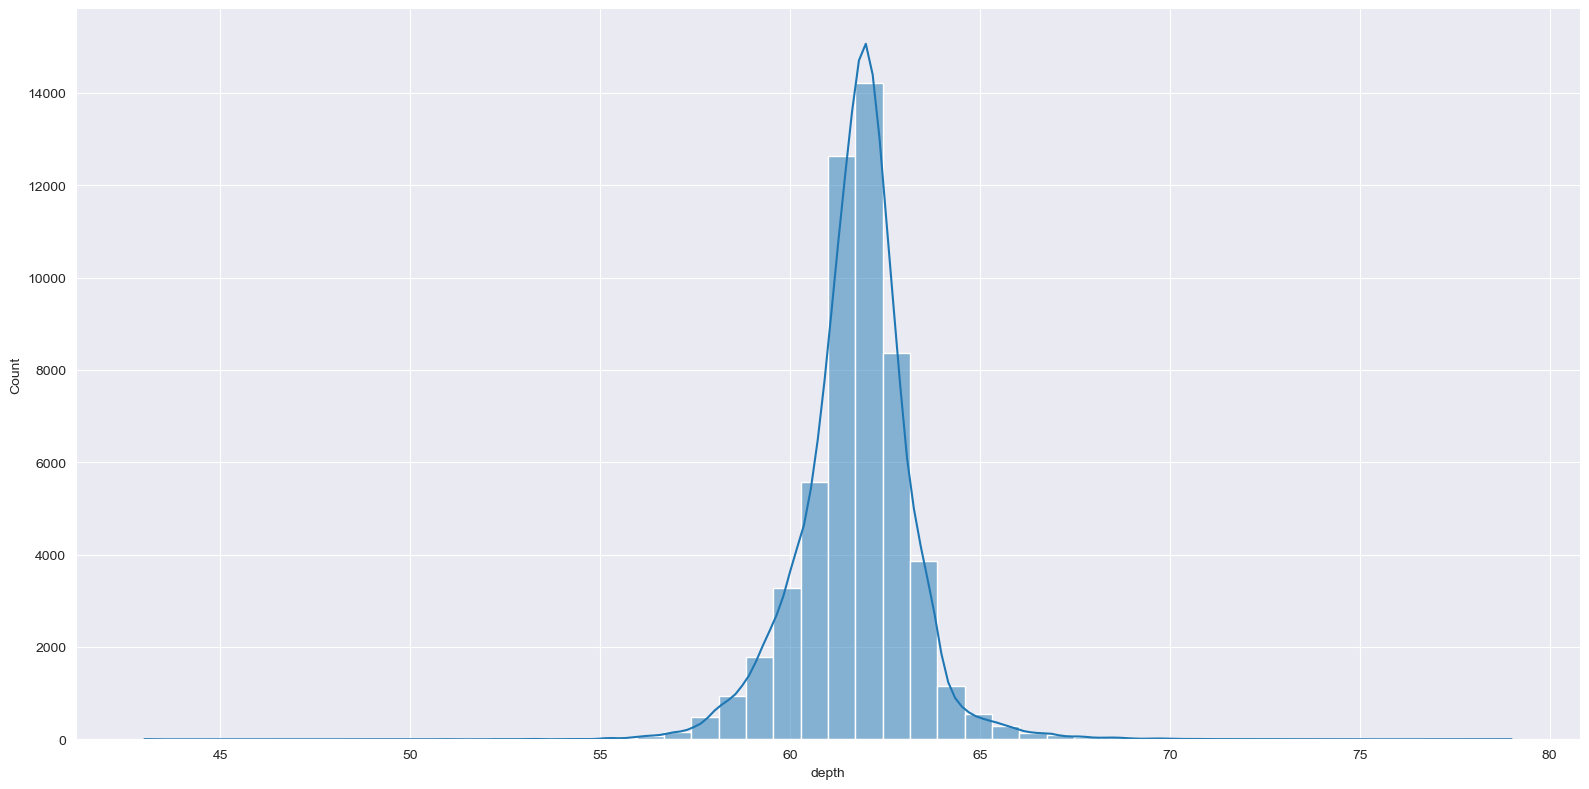

In [27]:
plt.figure(figsize=(8,12))
sns.displot(df['depth'], kde=True, bins=50, height=8, aspect=2);

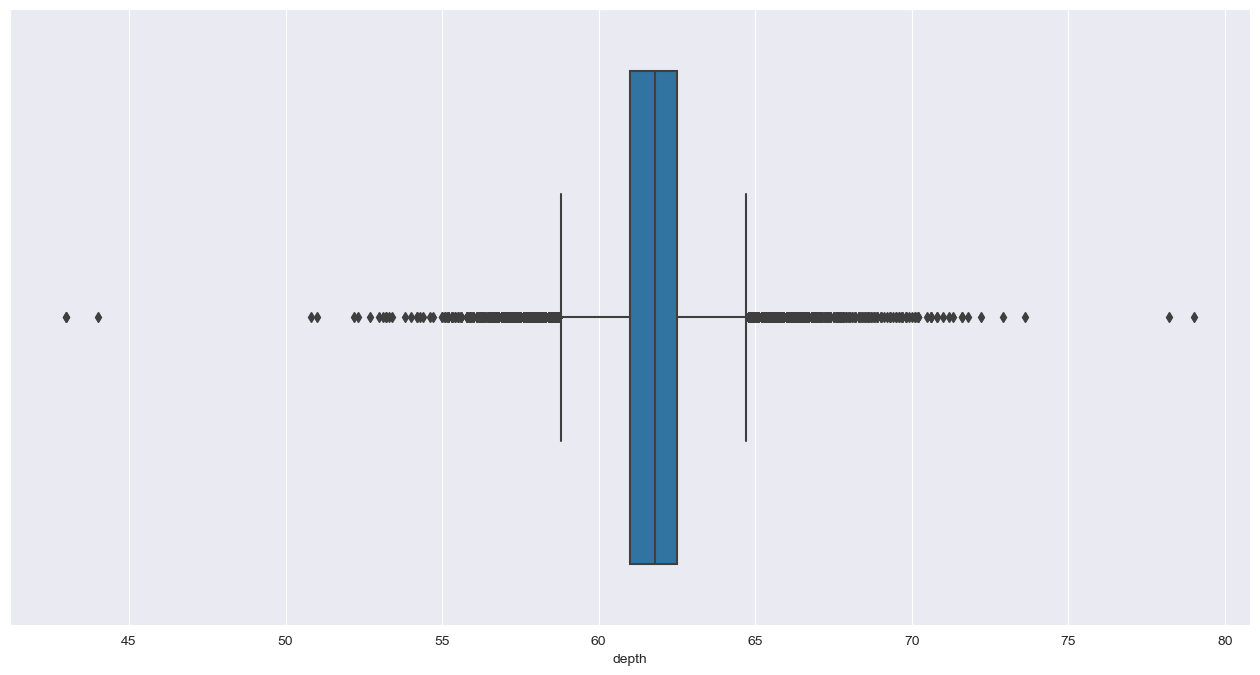

In [28]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x='depth', data=df, ax=ax);

In [29]:
df['depth'].describe()

count    53775.000000
mean        61.748232
std          1.429639
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

<u>Insights</u>: Distribution of depths is normal, not skewed. Min depth is 43 and the middle 50% values (IQR) fall between 61 (1st quartile) and 62.5 (3rd quartile). The value defined with 1.5xIQR sets the max boundary to 61+1.5x(62.5-61)=63.25, and the min boundary to 61-1.5x(62.5-61)=58.75, beyond which the depths could be treated as unusual or rare. It can be seen that there are lot of depths beyond these boundaries.

#### Distribution of "table" variable

<Figure size 800x1200 with 0 Axes>

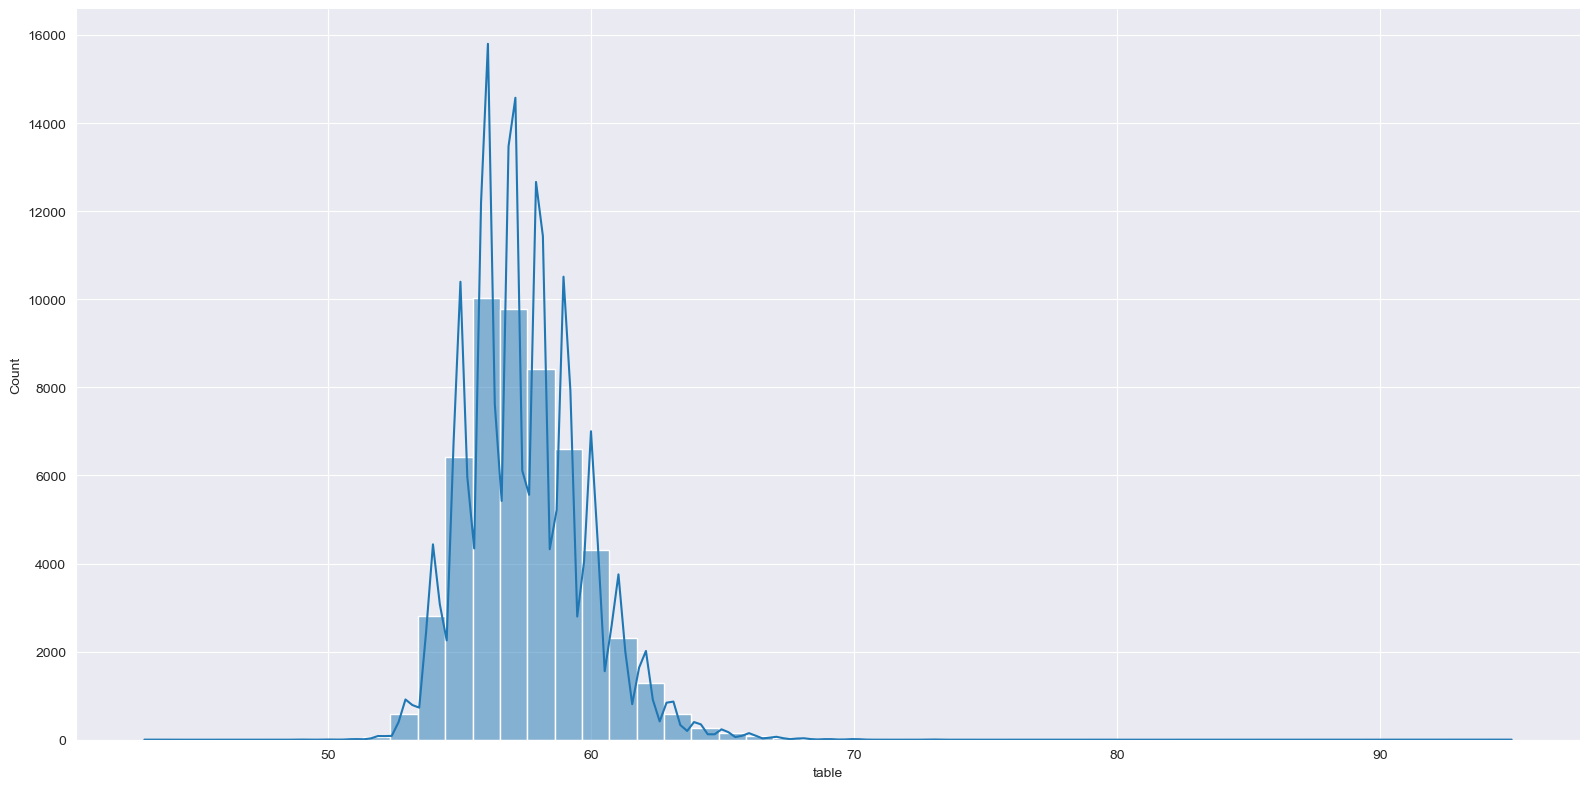

In [30]:
plt.figure(figsize=(8, 12))
sns.displot(df['table'], kde=True, bins=50, height=8, aspect=2);

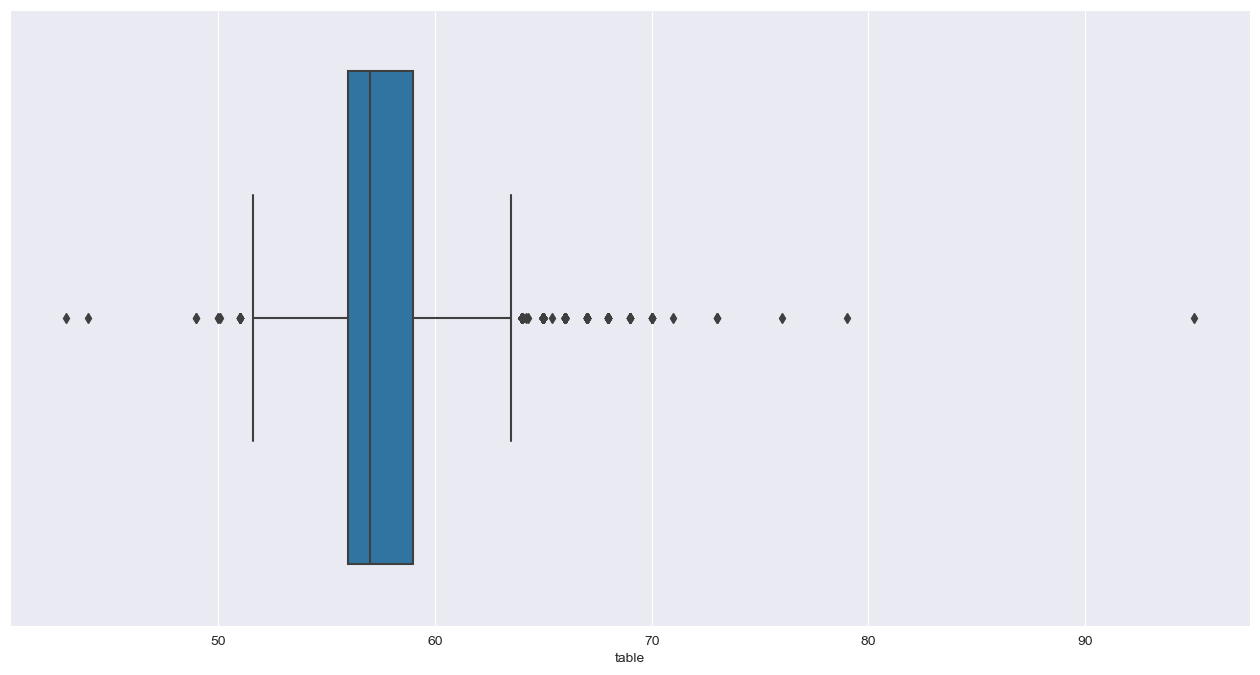

In [31]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x='table', data=df, ax=ax);

In [32]:
df['table'].describe()

count    53775.000000
mean        57.457806
std          2.233257
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

<u>Insights</u>: Distribution of tables is normal, not skewed. Min table is 43 and the middle 50% values (IQR) fall between 56 (1st quartile) and 59 (3rd quartile). The value defined with 1.5xIQR sets the max boundary to 59+1.5x(59-56)=63.5, and the min boundary to 56-1.5x(59-56)=51.5, beyond which the tables could be treated as unusual or rare. It can be seen that there is a number of tables beyond these boundaries.

#### Distribution of "price" variable

<Figure size 800x1200 with 0 Axes>

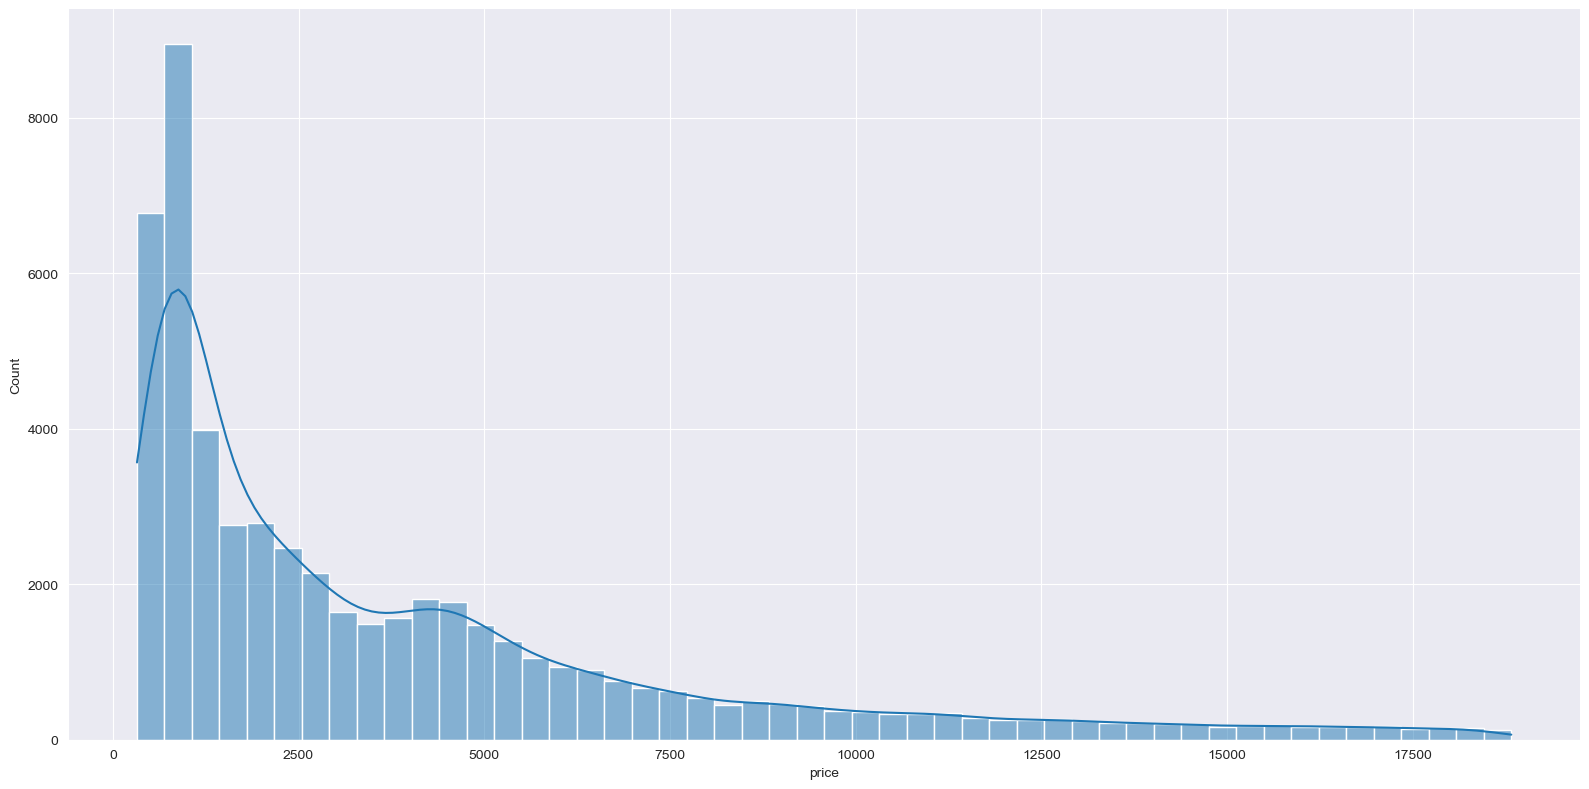

In [33]:
plt.figure(figsize=(8, 12))
sns.displot(df['price'], kde=True, bins=50, height=8, aspect=2);

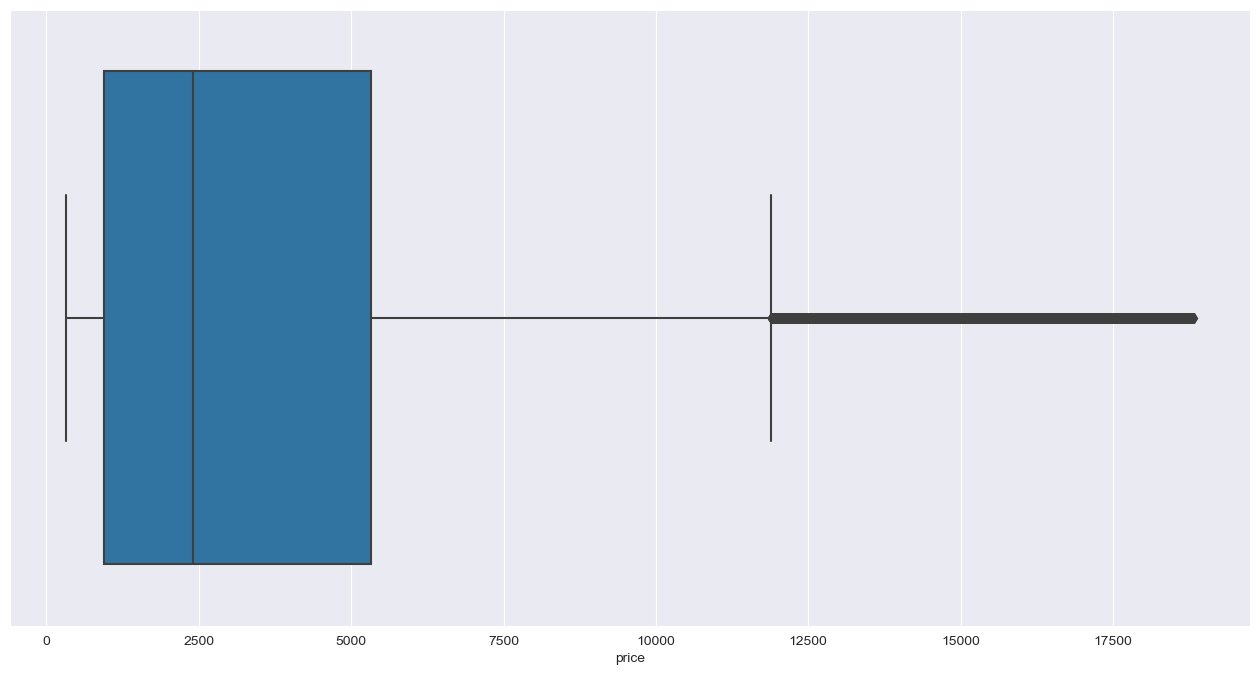

In [34]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x='price', data=df, ax=ax);

In [35]:
df['price'].describe()

count    53775.000000
mean      3931.220288
std       3985.918716
min        326.000000
25%        951.000000
50%       2401.000000
75%       5324.000000
max      18823.000000
Name: price, dtype: float64

<u>Insights</u>: Distribution of prices is right skewed. Min price is 326 and the middle 50% values (IQR) fall between 951 (1st quartile) and 5324 (3rd quartile). The value defined with 1.5xIQR sets the max boundary to 5324+1.5x(5324-951)=11883.5, above which the prices could be treated as unusual or rare. It can be seen that there are lot of prices above this boundary.

#### Distribution of "x" variable

<Figure size 800x1200 with 0 Axes>

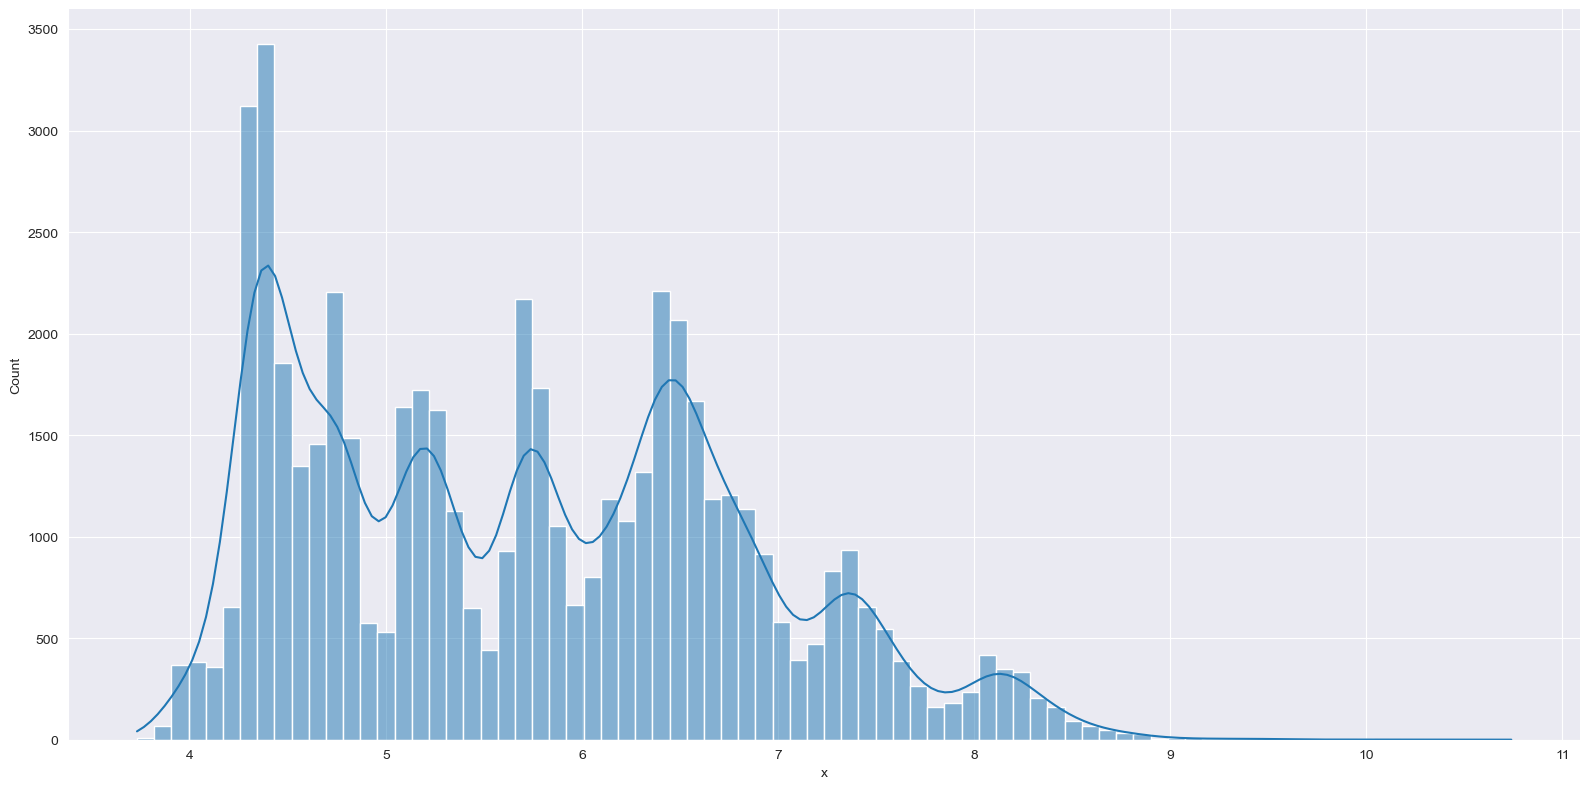

In [36]:
plt.figure(figsize=(8, 12))
sns.displot(df['x'], kde=True, bins=80, height=8, aspect=2);

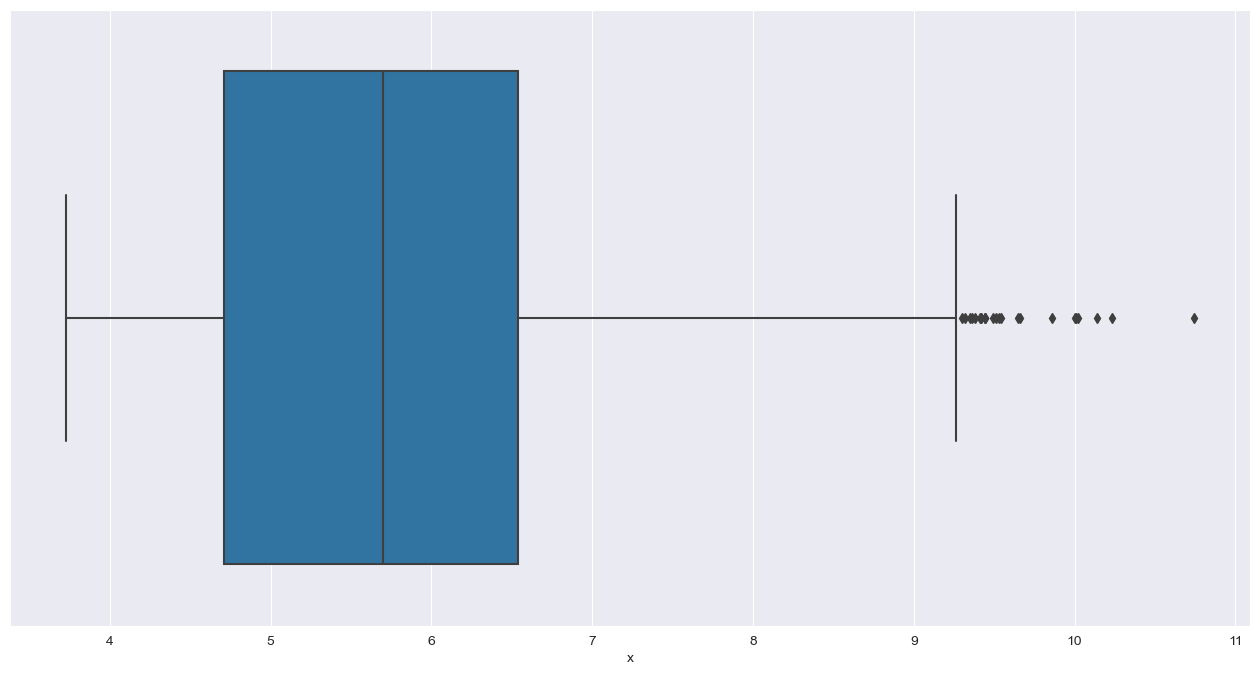

In [37]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(x='x', data=df, ax=ax);

In [38]:
df['x'].describe()

count    53775.000000
mean         5.731579
std          1.118611
min          3.730000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64

<u>Insights</u>: Distribution of x's is right skewed. Min x is 3.73 and the middle 50% values (IQR) fall between 4.71 (1st quartile) and 6.54 (3rd quartile). The value defined with 1.5xIQR sets the max boundary to 6.54+1.5x(6.54-4.71)=9.28, above which the x's could be treated as unusual or rare. It can be seen that there is a number of x's above this boundary.

#### Distribution of "y" variable

<Figure size 800x1200 with 0 Axes>

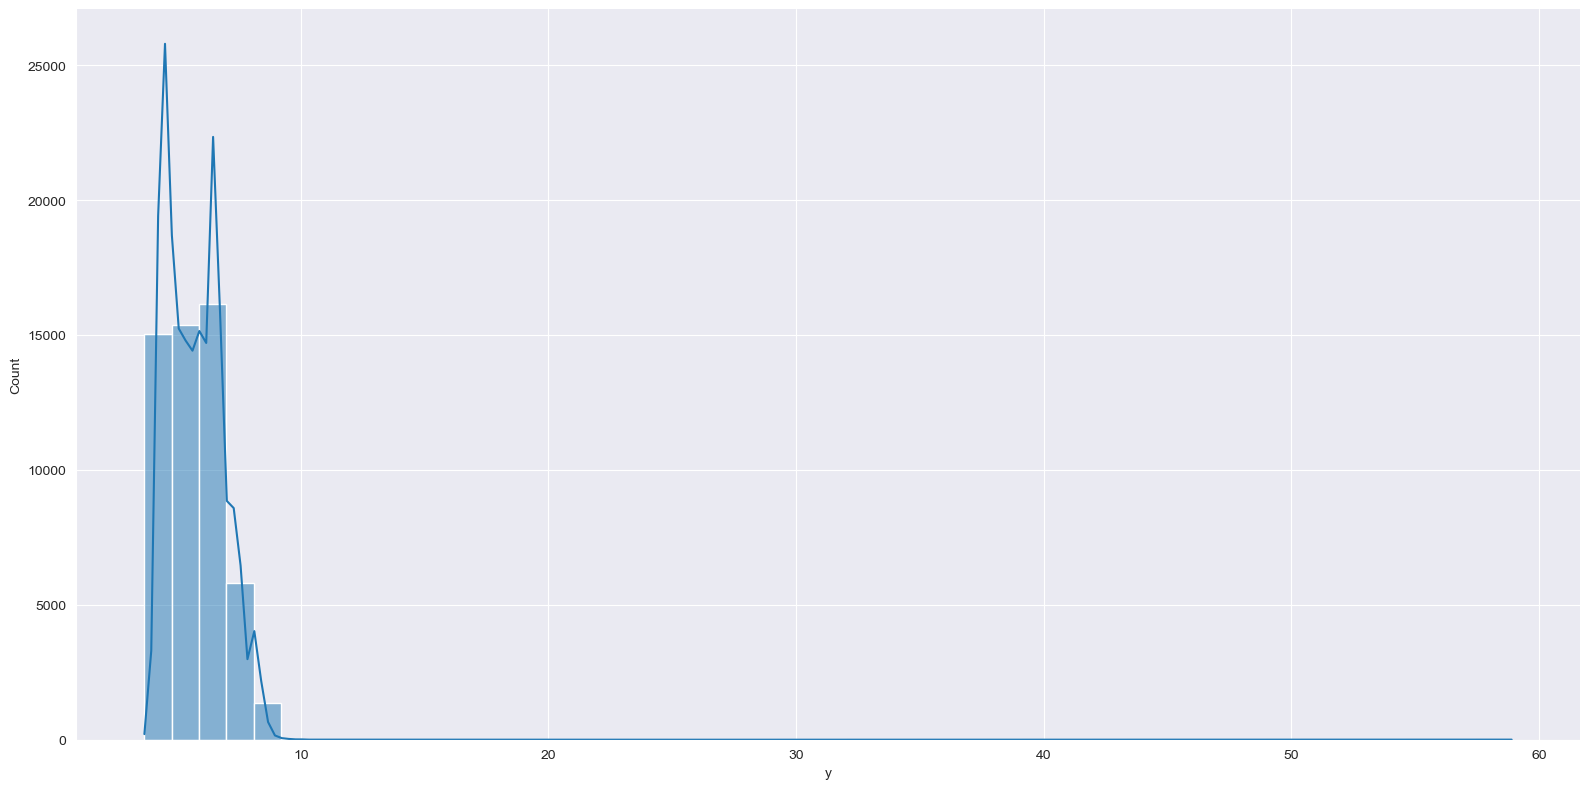

In [39]:
plt.figure(figsize=(8, 12))
sns.displot(df['y'], kde=True, bins=50, height=8, aspect=2);

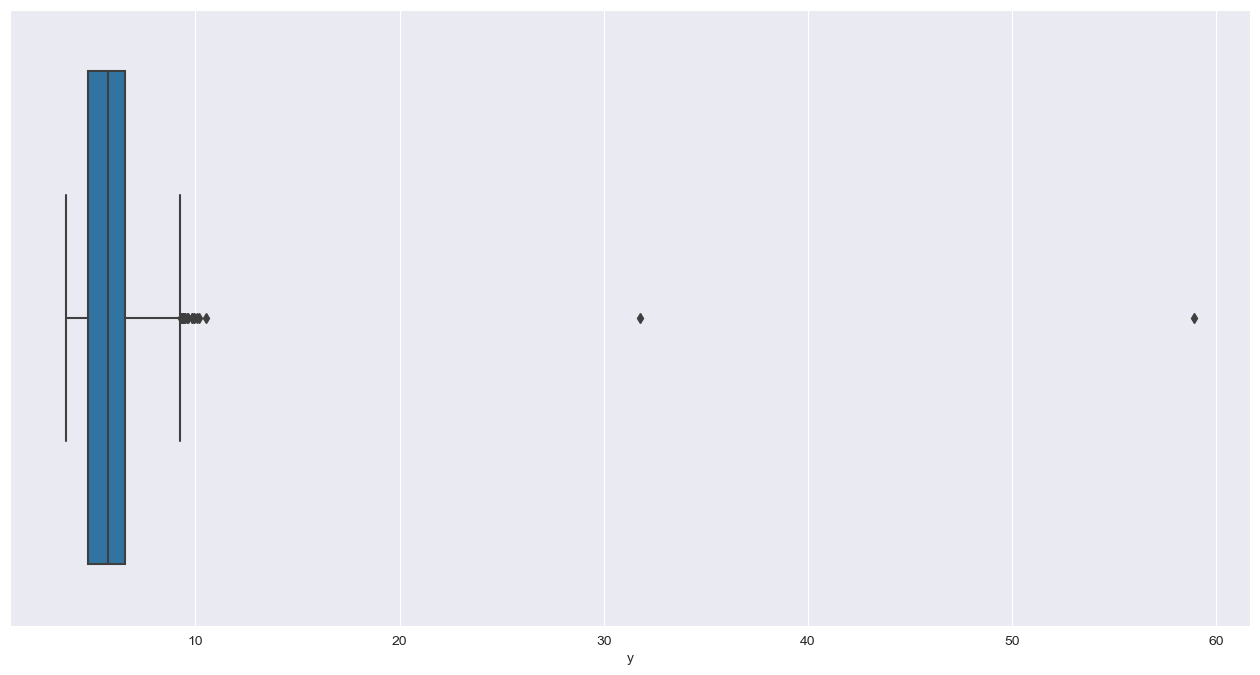

In [40]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x='y', data=df, ax=ax);

In [41]:
df['y'].describe()

count    53775.000000
mean         5.734909
std          1.139451
min          3.680000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64

<mark><u>**Insights**</u></mark>: Distribution of y's is right skewed. Min y is 3.68 and the middle 50% values (IQR) fall between 4.72 (1st quartile) and 6.54 (3rd quartile). The value defined with 1.5xIQR sets the max boundary to 6.54+1.5x(6.54-4.72)=9.27, above which the y's could be treated as unusual or rare. It can be seen that there is a number of y's above this boundary.

#### Distribution of "z" variable

<Figure size 800x1200 with 0 Axes>

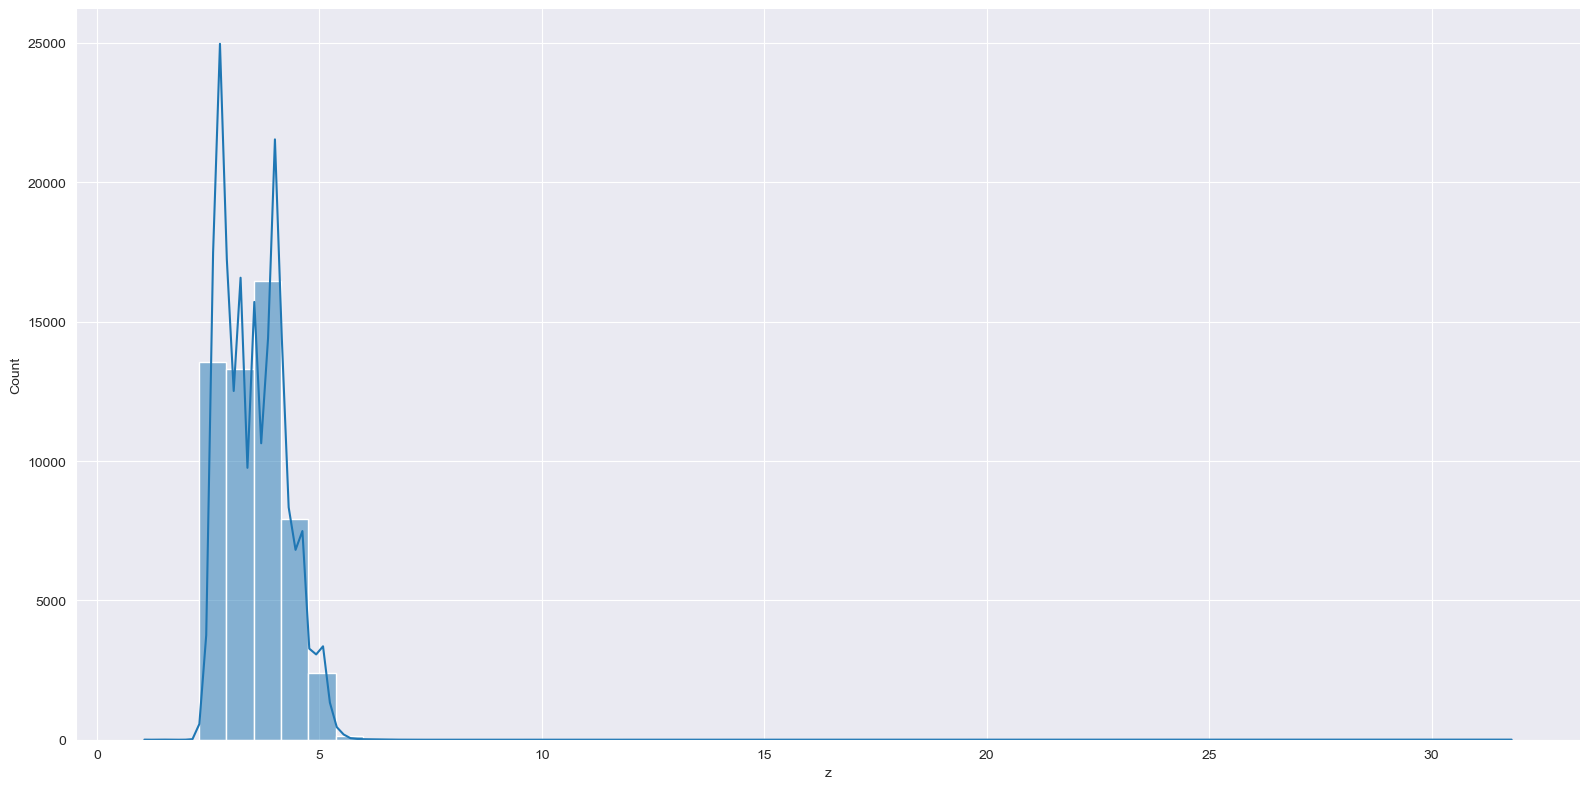

In [42]:
plt.figure(figsize=(8, 12))
sns.displot(df['z'], kde=True, bins=50, height=8, aspect=2);

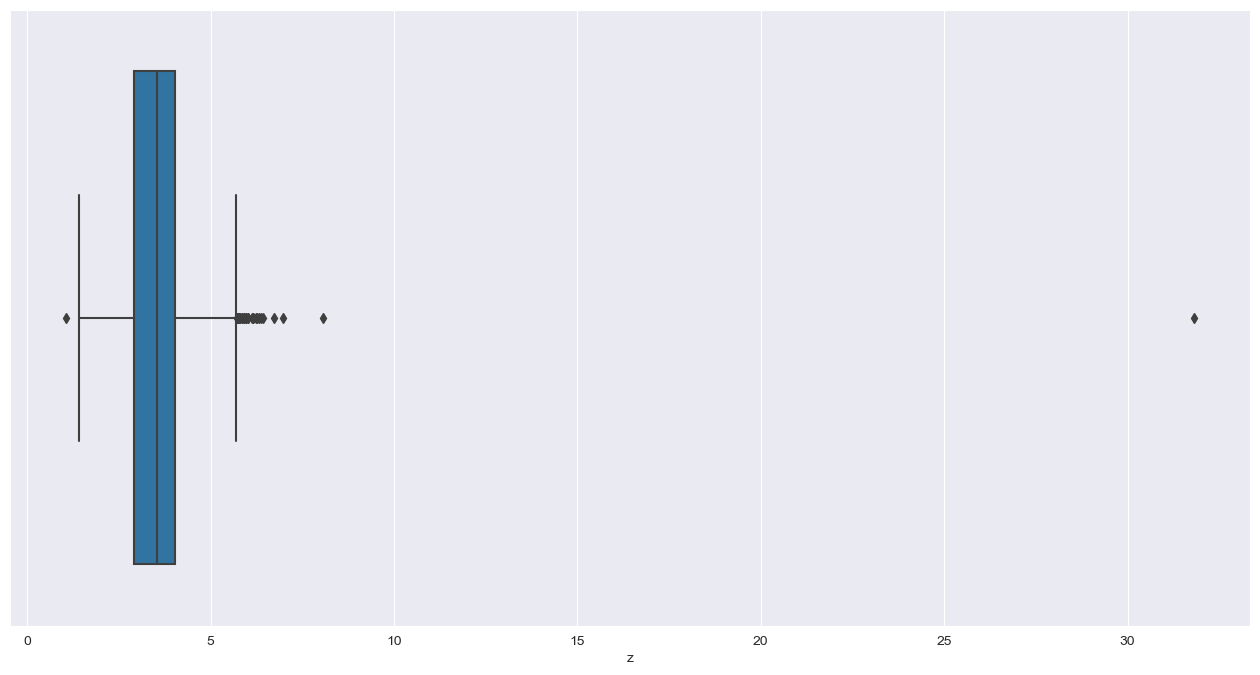

In [43]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x='z', data=df, ax=ax);

In [44]:
df['z'].describe()

count    53775.000000
mean         3.539964
std          0.702017
min          1.070000
25%          2.910000
50%          3.530000
75%          4.030000
max         31.800000
Name: z, dtype: float64

<mark><u>**Insights**</u></mark>: Distribution of z's is right skewed. Min z is 1.07 and the middle 50% values (IQR) fall between 2.91 (1st quartile) and 4.03 (3rd quartile). The value defined with 1.5xIQR sets the max boundary to 4.03+1.5x(4.03-2.91)=5.74, and the min boundary to 2.91-1.5x(4.03-2.91)=1.22, beyond which the z's could be treated as unusual or rare. It can be seen that there is a number of z's beyond these boundaries.

#### 5.1.2. Analizing distributions of categorical variables

#### Distribution of "cut" variable

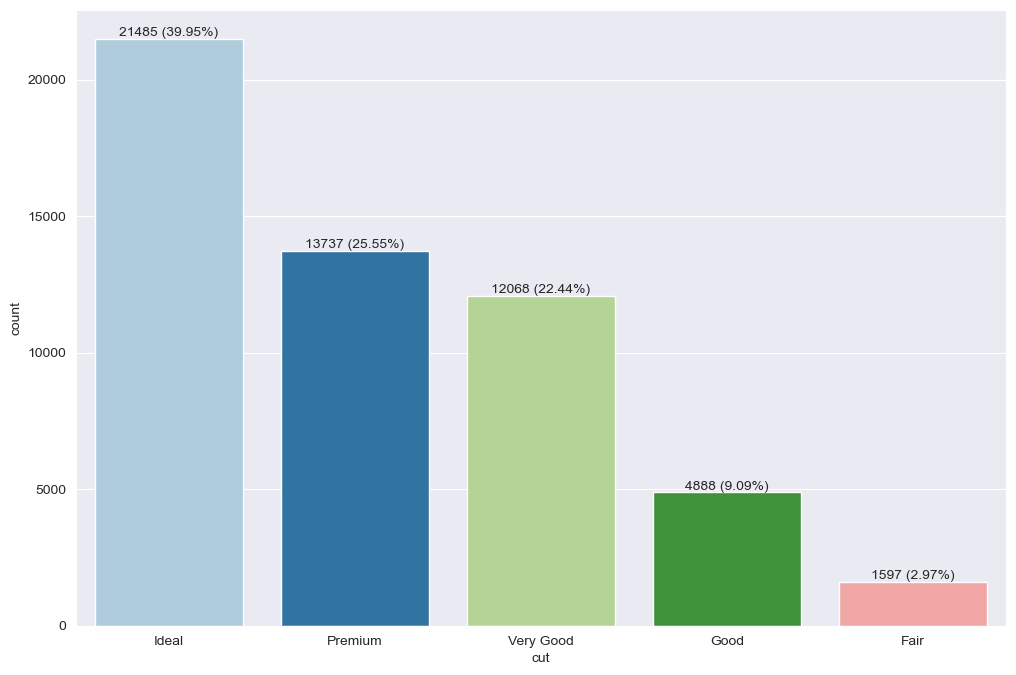

In [45]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(df, x='cut', order=df['cut'].value_counts(ascending=False).index, palette='Paired');

abs_values = df['cut'].value_counts(ascending=False)
rel_values = df['cut'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.2f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls);

<mark><u>**Insights**</u></mark>: Most of diamonds are of the ideal cut, least of the fair cut.

#### Distribution of "color" variable

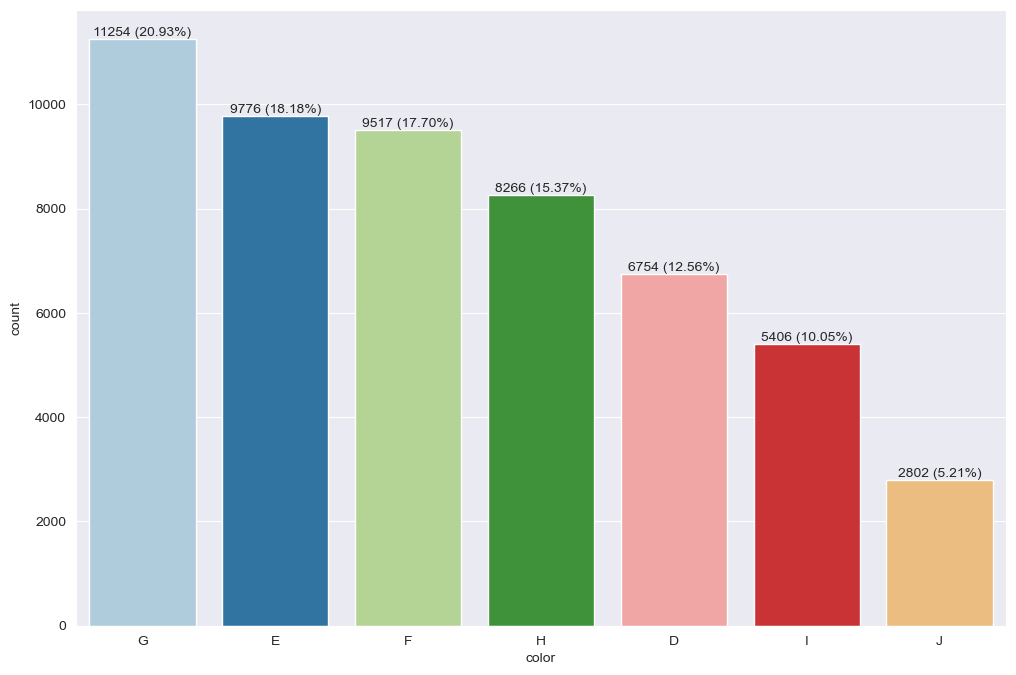

In [46]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(df, x='color', order=df['color'].value_counts(ascending=False).index, palette='Paired');

abs_values = df['color'].value_counts(ascending=False)
rel_values = df['color'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.2f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls);

<mark><u>**Insights**</u></mark>: Most of diamonds are of the G color, least of the J color.

#### Distribution of "clarity" variable

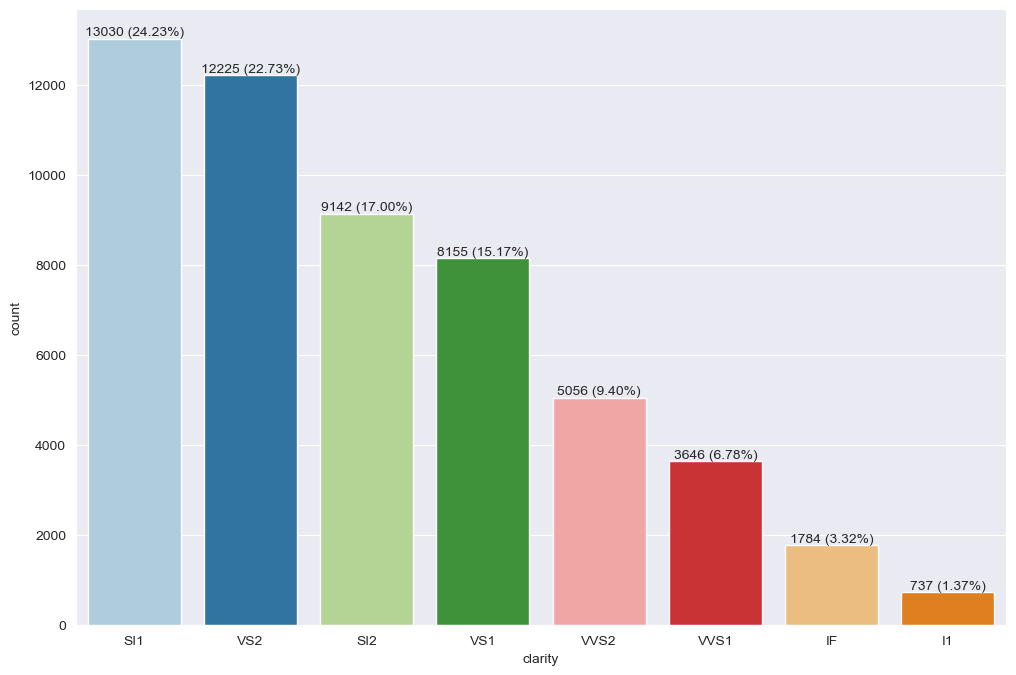

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
sns.countplot(df, x='clarity', order=df['clarity'].value_counts(ascending=False).index, palette='Paired');

abs_values = df['clarity'].value_counts(ascending=False)
rel_values = df['clarity'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.2f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls);

<mark><u>**Insights**</u></mark>: Most of diamonds are of the SI1 clarity, least of the I1 clarity.

#### 5.2 Bivariate Analysis  

<Figure size 1000x1000 with 0 Axes>

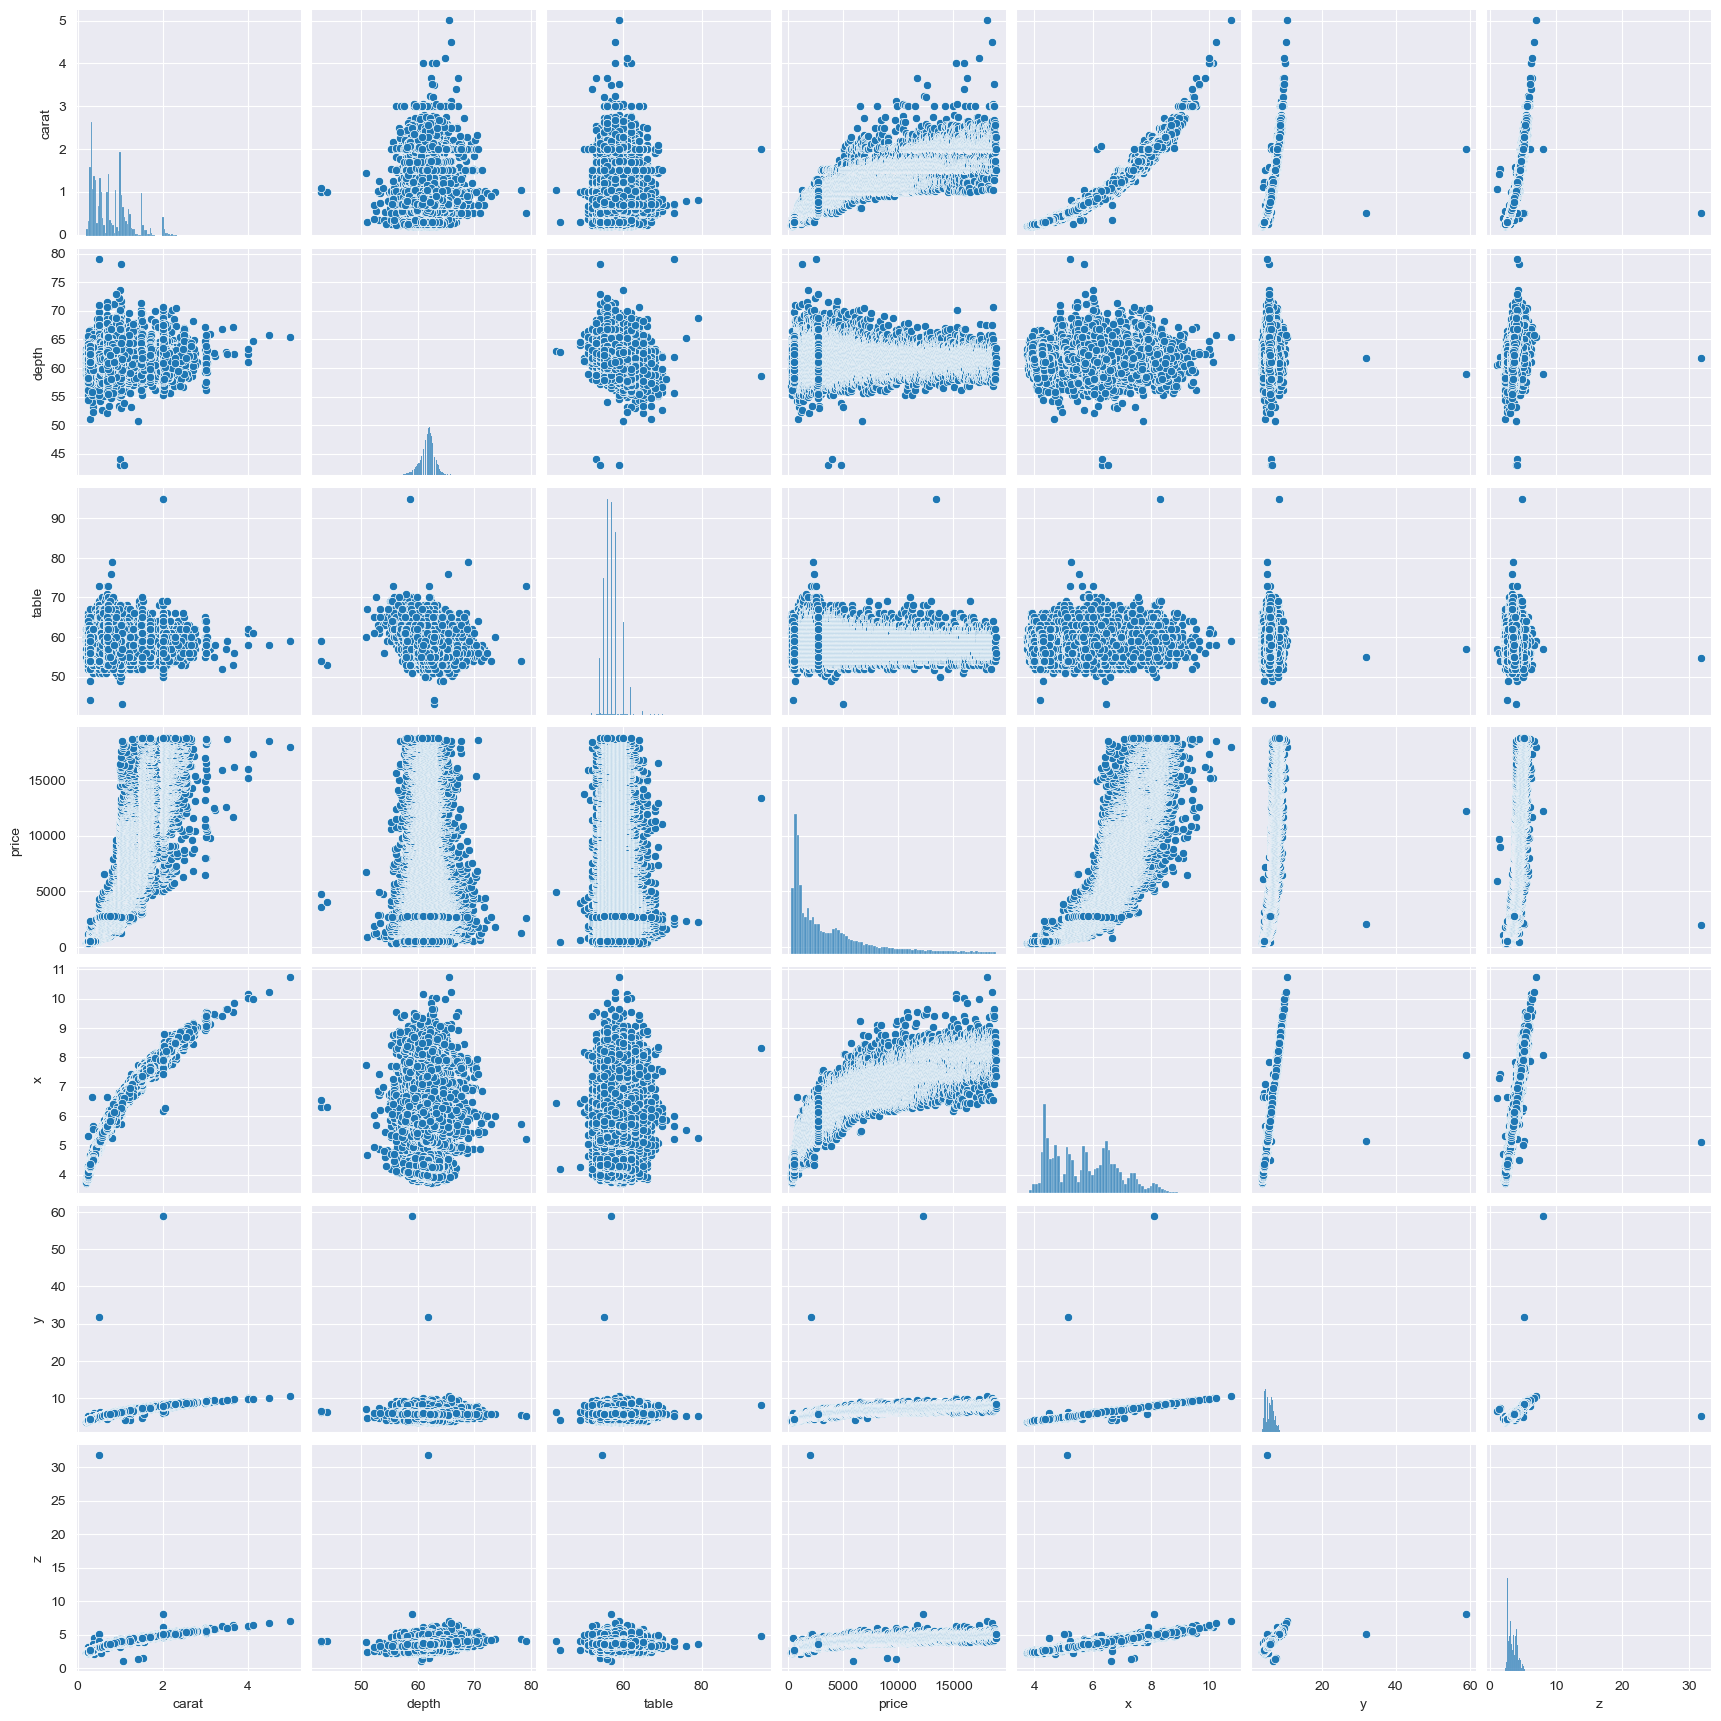

In [48]:
plt.figure(figsize=(10,10))
sns.pairplot(df.select_dtypes(include='number'));

#### How does "carat" affect the price - spotting outliers

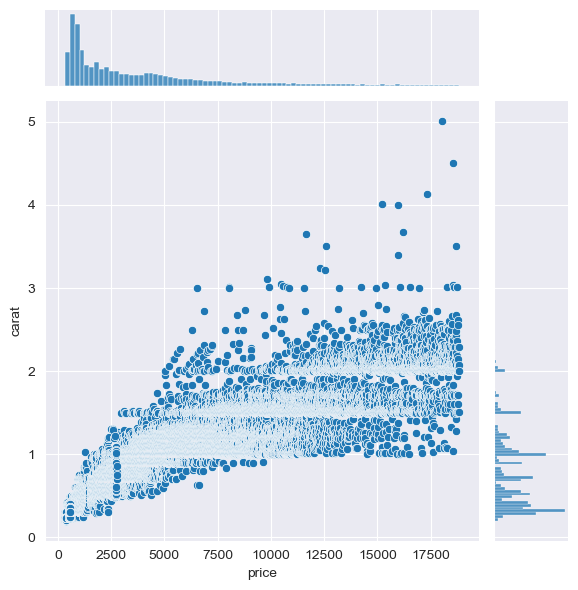

In [49]:
sns.jointplot(x='price', y='carat', data=df);

<mark><u>**Insights**</u></mark>: Most of the carat values lie between 0.2-2.8 with all price range. There are outliers >=3.

#### How does "depth" affect the price - spotting outliers  

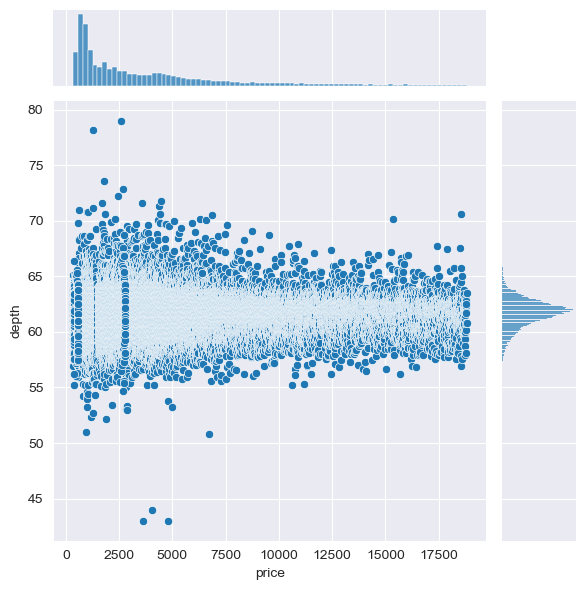

In [50]:
sns.jointplot(x='price', y='depth', data=df);

<mark><u>**Insights**</u></mark>: Most of the depth values lie between 55-68 with all price range. There are outliers <=52 and >=72.

#### How does "table" affect the price - spotting outliers

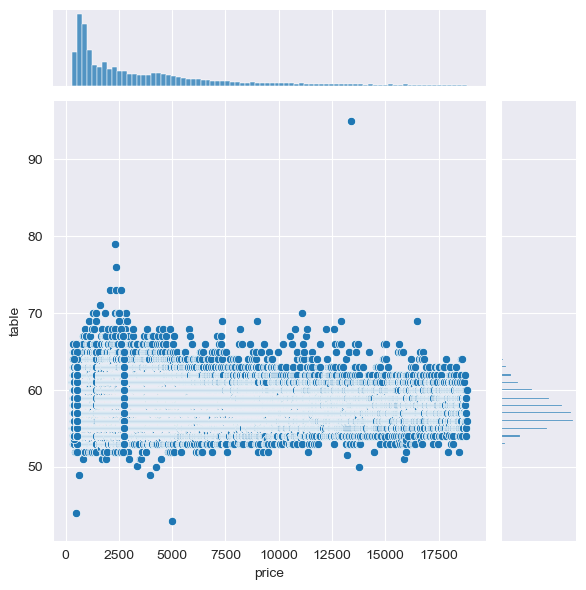

In [51]:
sns.jointplot(x='price', y='table', data=df);

<mark><u>**Insights**</u></mark>: Most of the table values lie between 52-68 with all price range. There are outliers <=50 and >=70.

#### How does "x" affect the price - spotting outliers

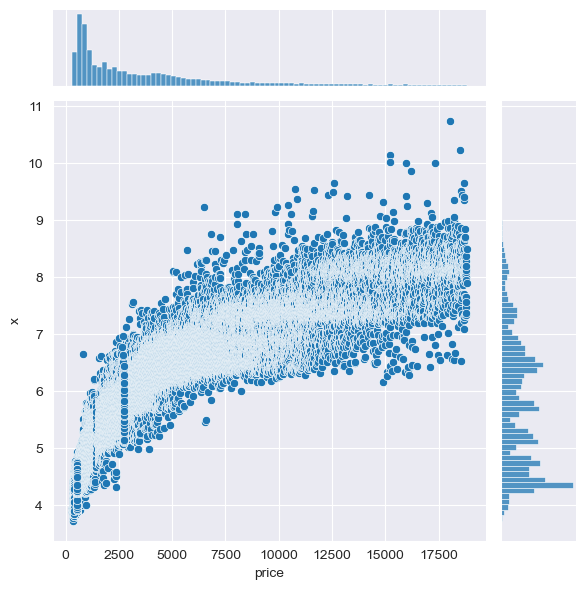

In [52]:
sns.jointplot(x='price', y='x', data=df);

<mark><u>**Insights**</u></mark>: Most of x values lie between 4-9.5 with all price range. There are outliers <=4 and >=10.

#### How does "y" affect the price - spotting outliers

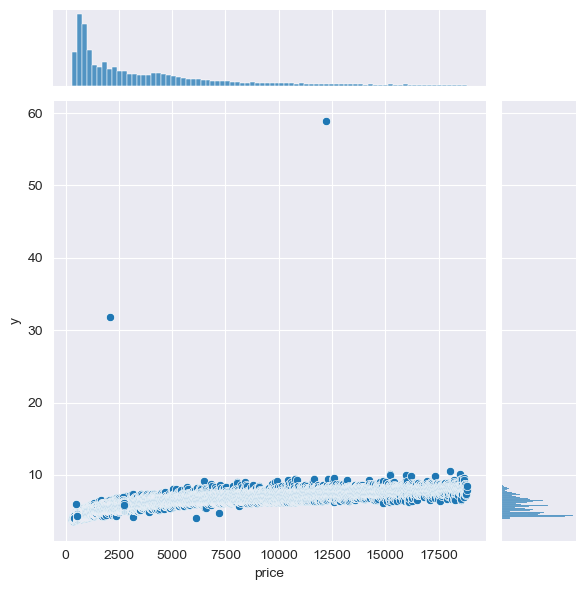

In [53]:
sns.jointplot(x='price', y='y', data=df);

<mark><u>**Insights**</u></mark>: Most of y values lie between 4-10 with all price range. There are outliers <=3 and >=30.

#### How does "z" affect the price - spotting outliers

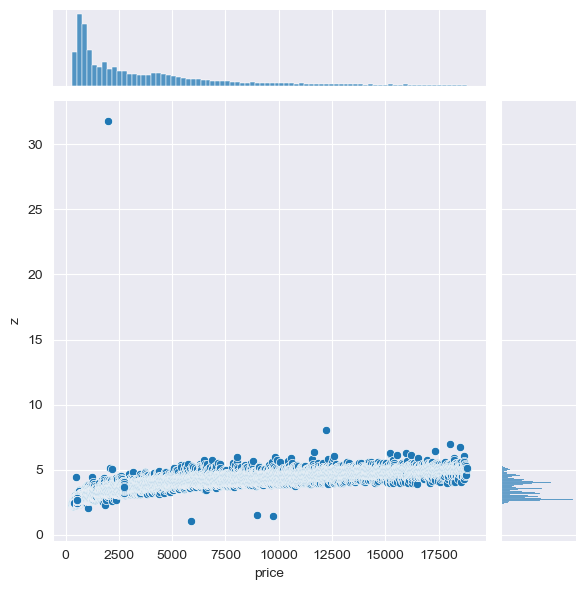

In [54]:
sns.jointplot(x='price', y='z', data=df);

<mark><u>**Insights**</u></mark>: Most of z values lie between 3-7 with all price range. There are outliers <=2 and >=7.

#### How does "cut" affect the price

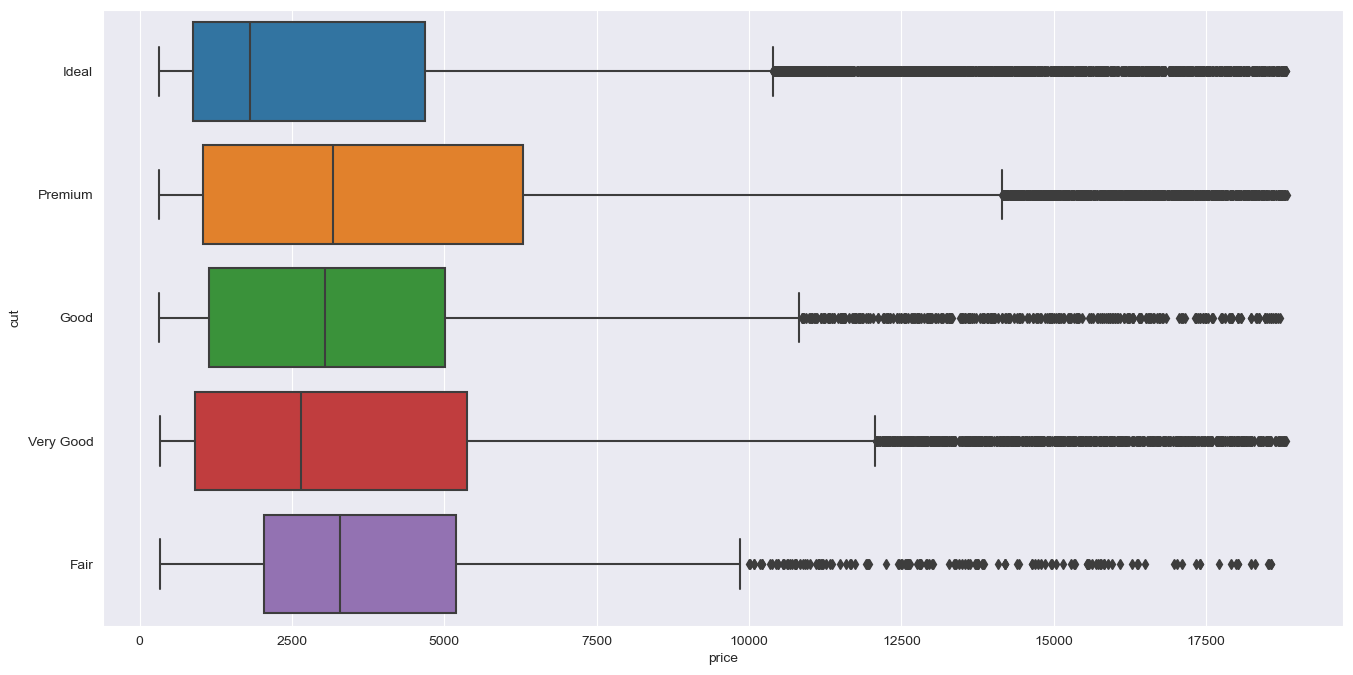

In [55]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x='price', y='cut', data=df, ax=ax);

#### How does "color" affect the price

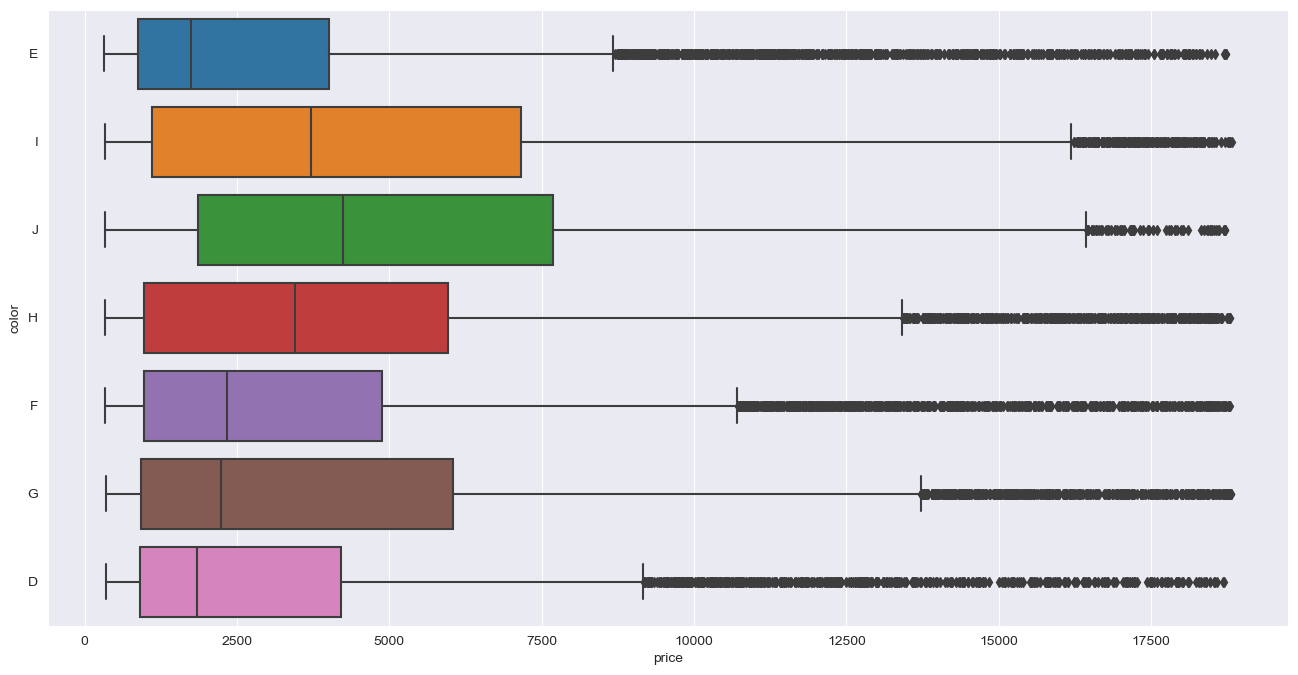

In [56]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x='price', y='color', data=df, ax=ax);

#### How does "clarity" affect the price

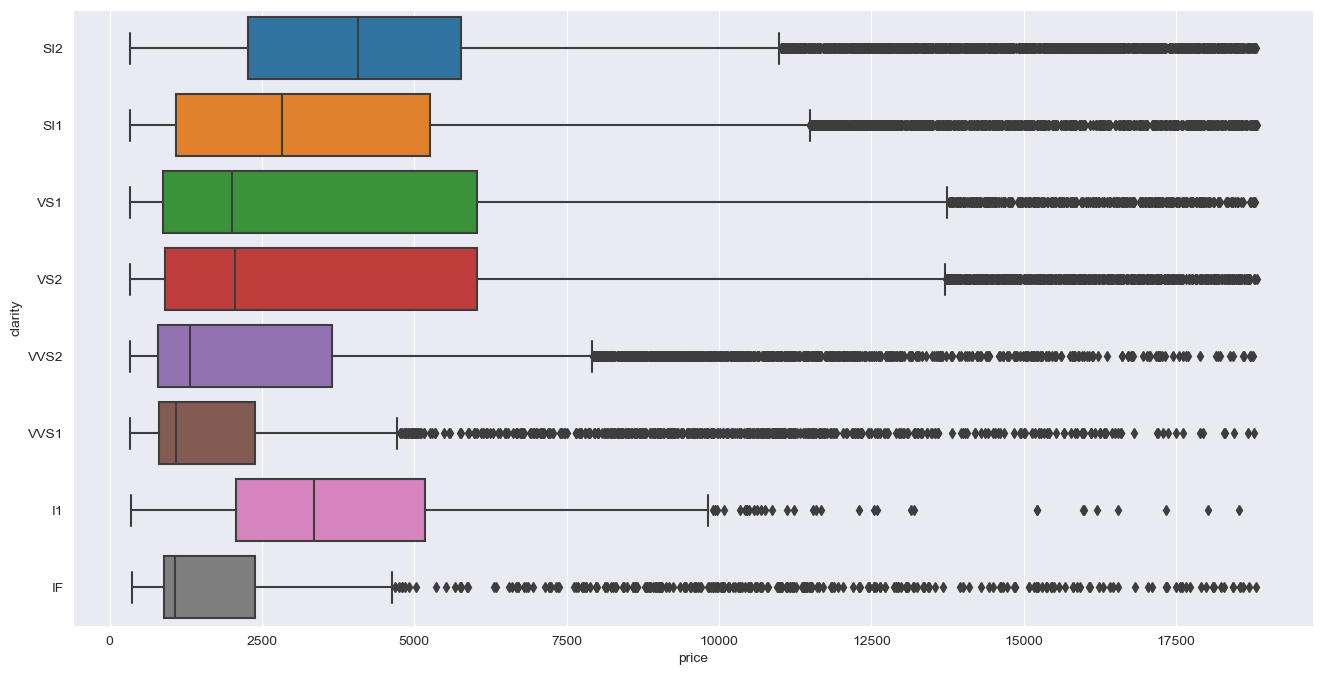

In [57]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(x='price', y='clarity', data=df, ax=ax);

#### Correlation map

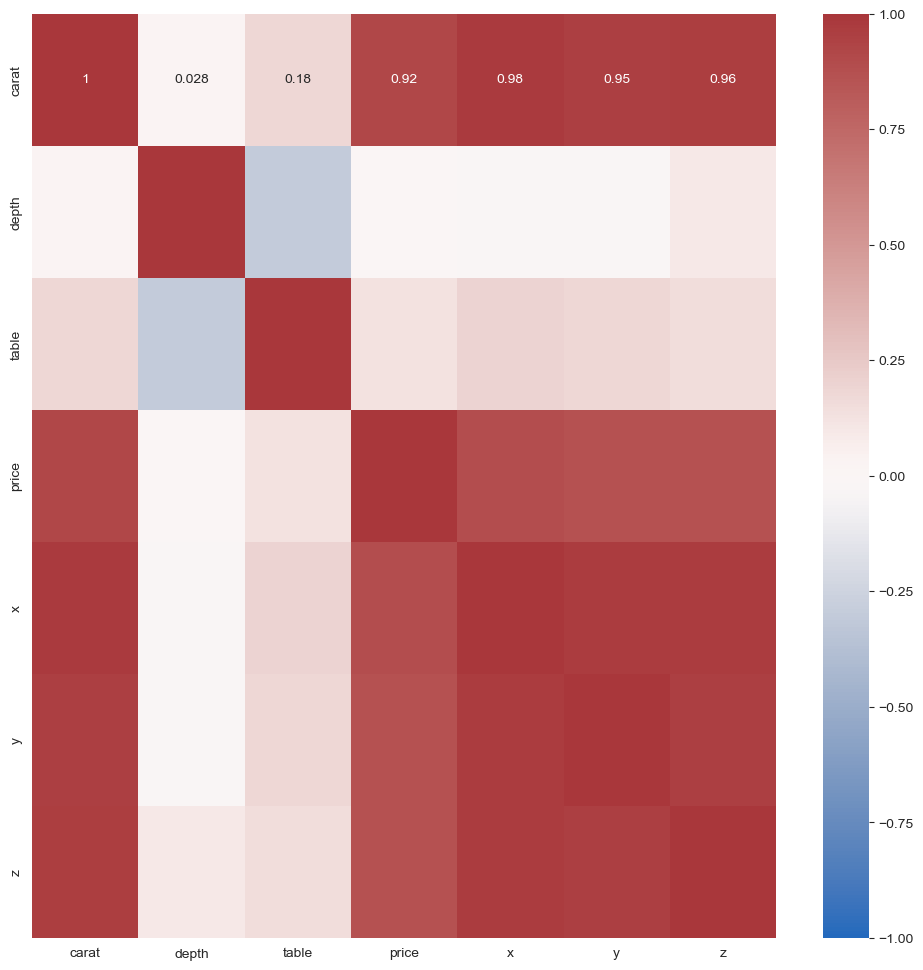

In [58]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(numeric_only=True), cbar=True, annot=True, cmap='vlag', vmin = -1, vmax = 1);

<mark><u>**Insights**</u></mark>: 
+ High positive correlation between carat-price, carat-x, carat-y, carat-z
+ High positive correlation between price-x, price-y, price-z
+ High positive correlation between x-y, x-z
+ High positive correlation between y-z
+ Negative correlation between table–depth
+ Low correlation between depth-price, table-price 

#### Removing outliers

In [59]:
df_trimmed = df[(df['carat']<3)]
df_trimmed = df_trimmed[(df_trimmed['depth']<72) & (df_trimmed['depth']>52)]
df_trimmed = df_trimmed[(df_trimmed['table']<70) & (df_trimmed['depth']>50)]
df_trimmed = df_trimmed[(df_trimmed['x']<10) & (df_trimmed['x']>4)]
df_trimmed = df_trimmed[(df_trimmed['y']<30) & (df_trimmed['y']>3)]
df_trimmed = df_trimmed[(df_trimmed['z']<7) & (df_trimmed['z']>2)]

<Figure size 1000x1000 with 0 Axes>

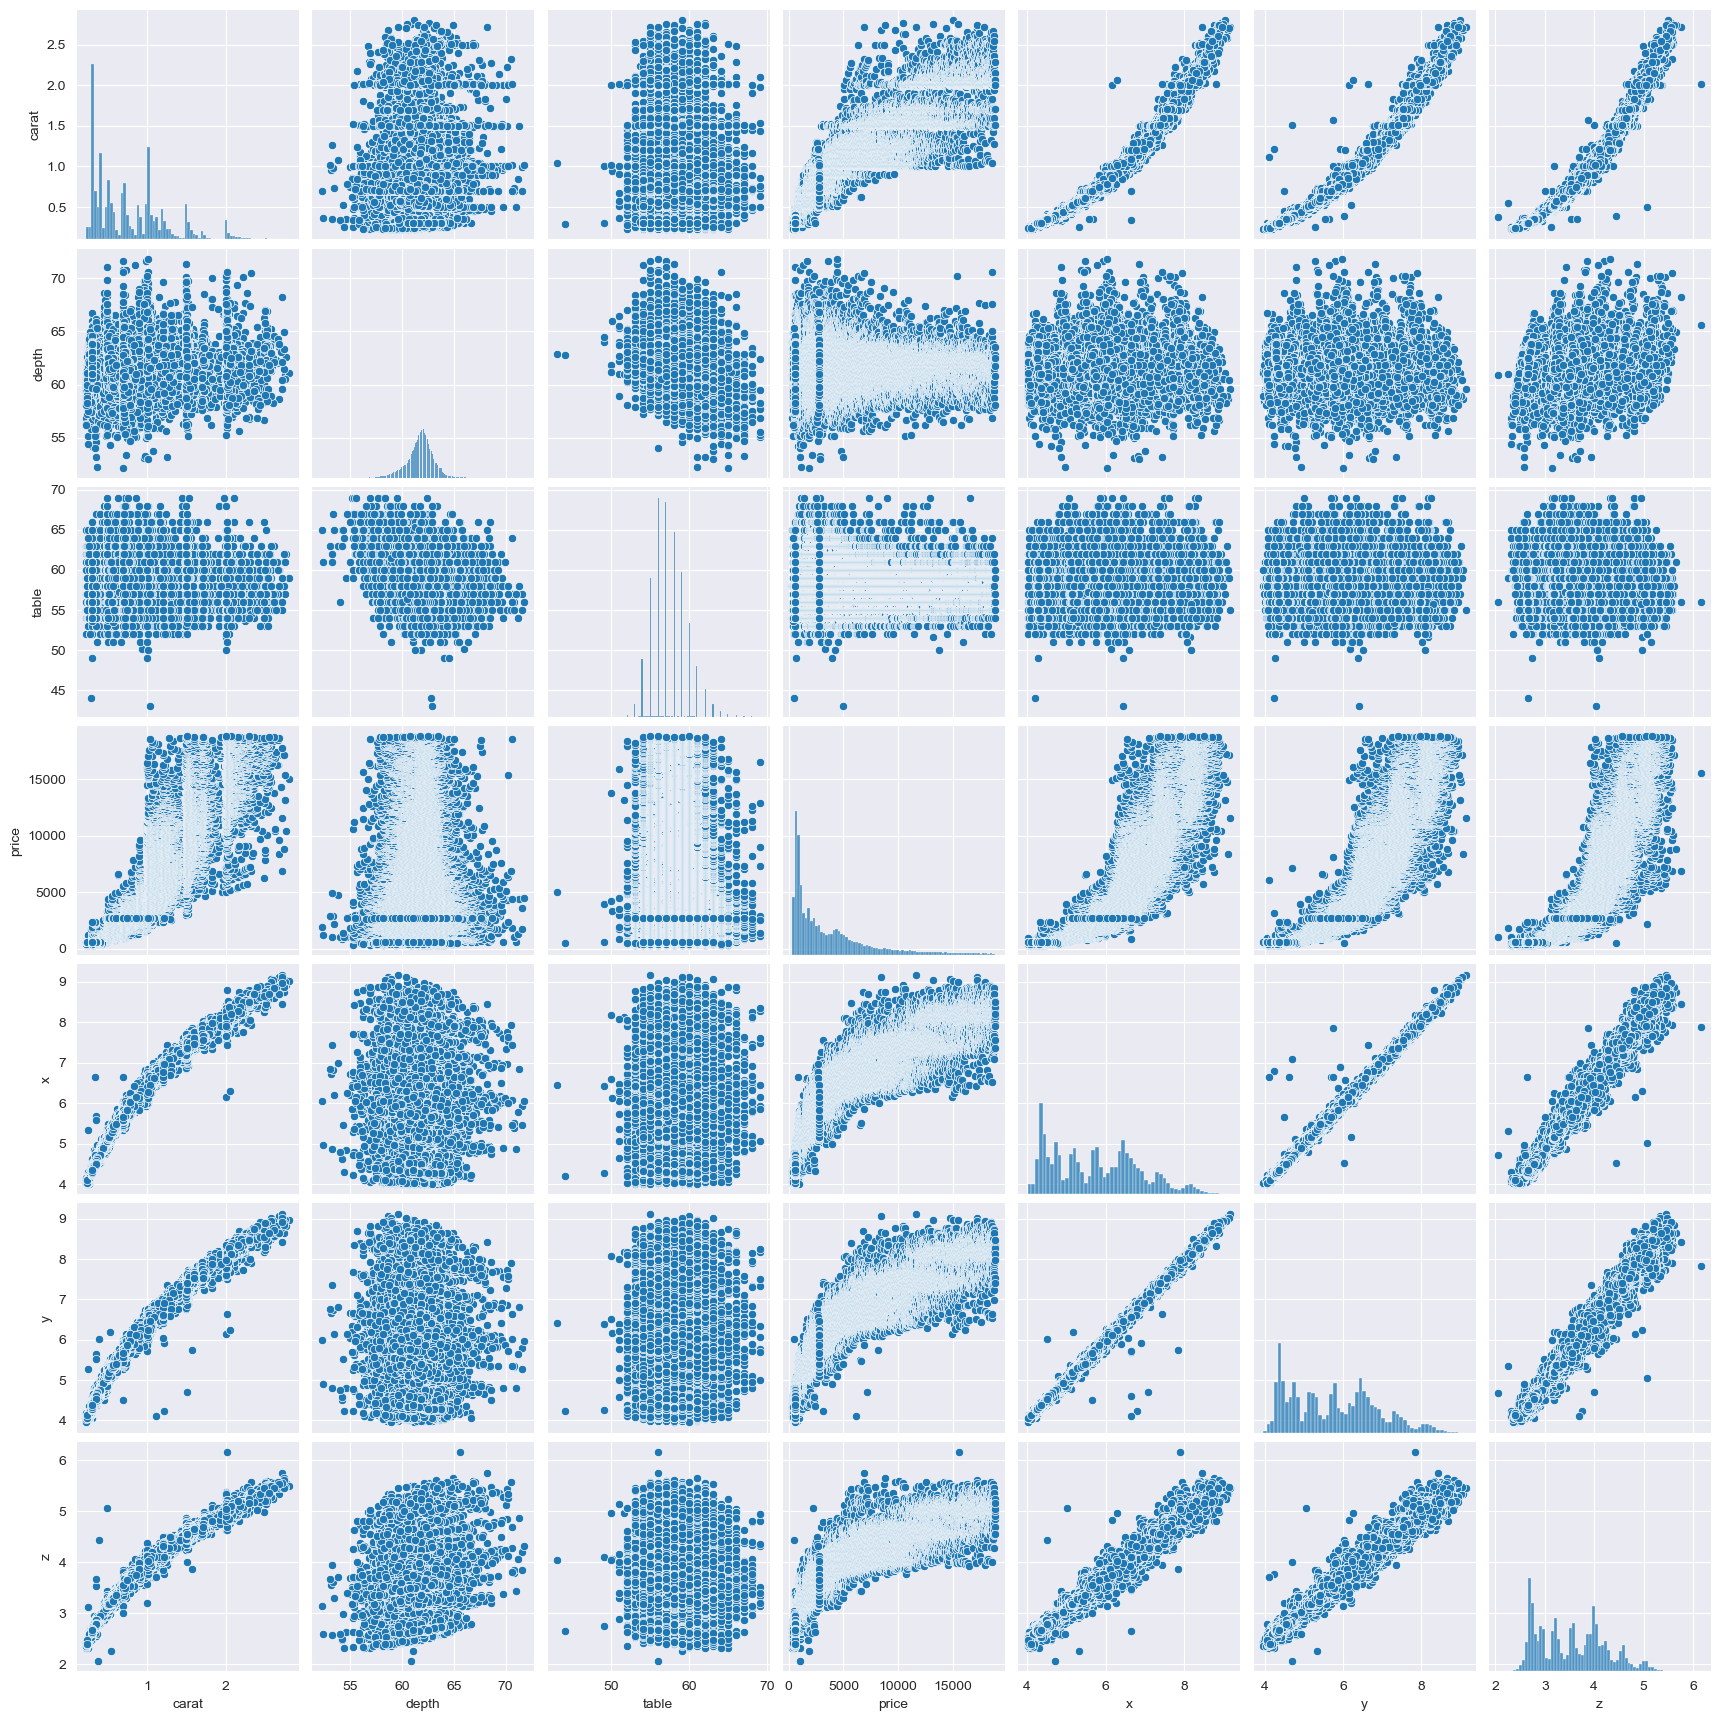

In [60]:
plt.figure(figsize=(10,10))
sns.pairplot(df_trimmed.select_dtypes(include='number'));

#### 5.3. Multivariate analysis  

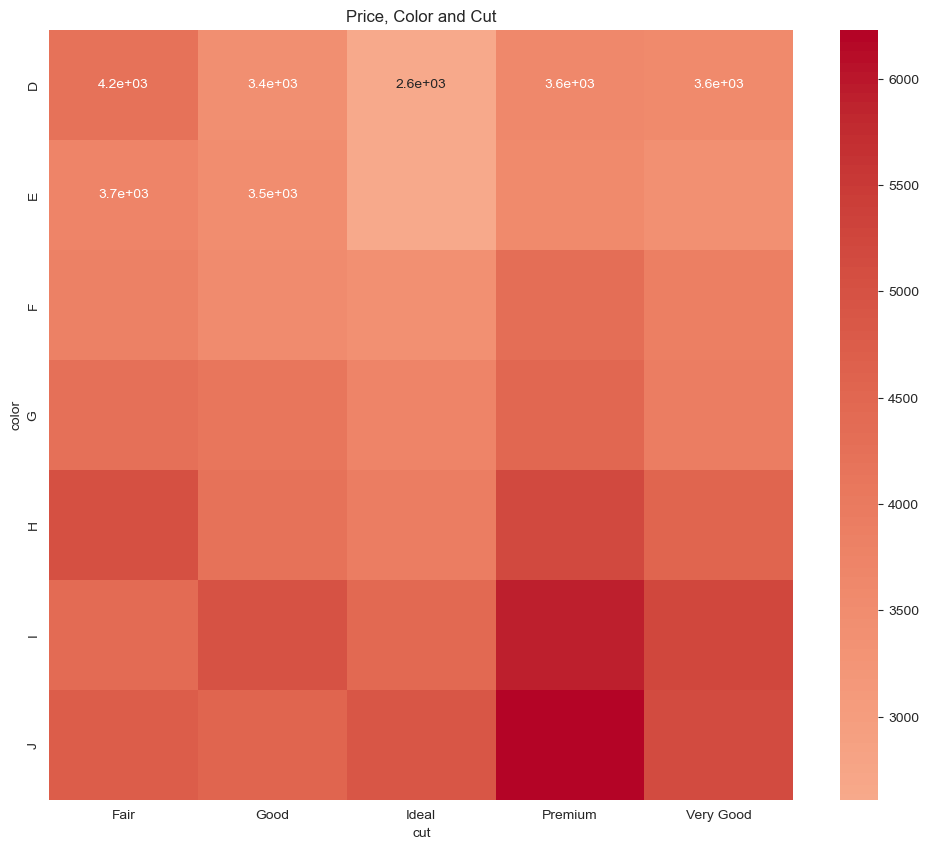

In [61]:
# Create a pivot table for color and cut with price as values
grouped = pd.pivot_table(data=df_trimmed, index='color', columns='cut', values='price', aggfunc='mean')

# Create a heatmap to visualize color, cut and price
plt.figure(figsize=[12,10])
sns.heatmap(grouped, annot=True, cmap='coolwarm', center=0.117)

plt.title("Price, Color and Cut")
plt.show()

<mark><u>**Insights**</u></mark>: There is a highest price for J color and Premium cut, the lowest for D color and Ideal cut.

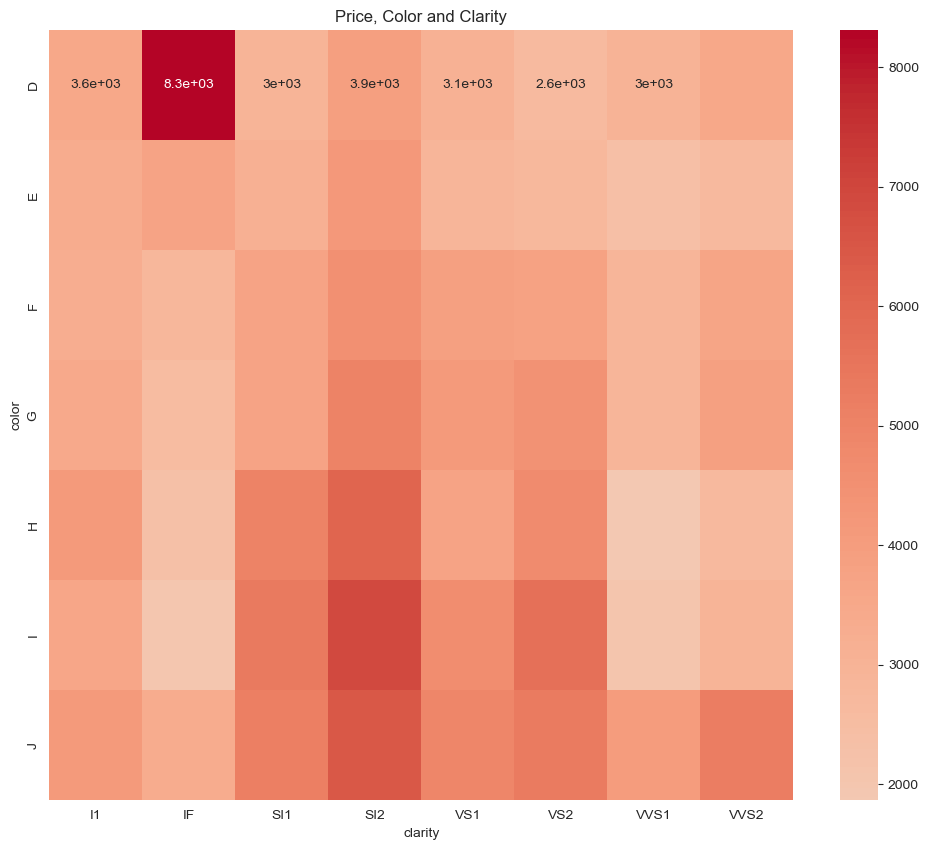

In [62]:
# Create a pivot table for color and clarity with price as values
grouped = pd.pivot_table(data=df_trimmed, index='color', columns='clarity', values='price', aggfunc='mean')

# Create a heatmap to visualize color, clarity and price
plt.figure(figsize=[12,10])
sns.heatmap(grouped, annot=True, cmap='coolwarm', center=0.117)

plt.title("Price, Color and Clarity")
plt.show()

<mark><u>**Insights**</u></mark>: There is a highest price for D color and IF clarity, the lowest for H color and WS1 clarity.

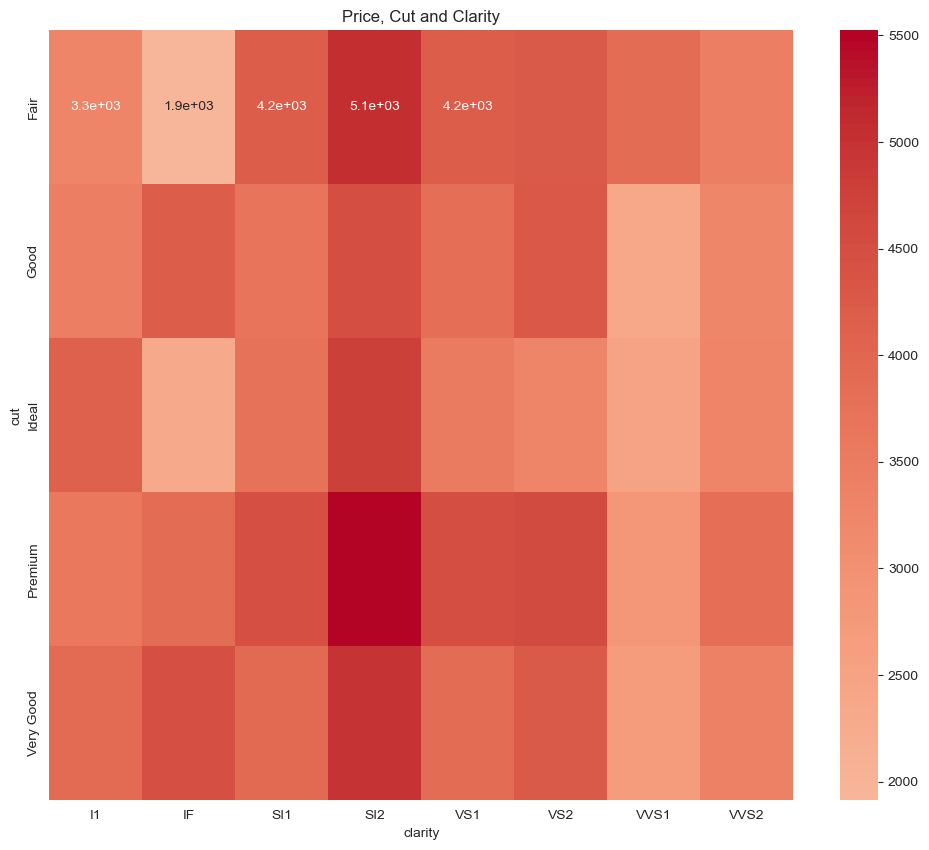

In [63]:
# Create a pivot table for cut and clarity with price as values
grouped = pd.pivot_table(data=df_trimmed, index='cut', columns='clarity', values='price', aggfunc='mean')

# Create a heatmap to visualize cut, clarity and price
plt.figure(figsize=[12,10])
sns.heatmap(grouped, annot=True, cmap='coolwarm', center=0.117)

plt.title("Price, Cut and Clarity")
plt.show()

<mark><u>**Insights**</u></mark>: There is a highest price for Premium cut and SI2 clarity, the lowest for Ideal cut and IF clarity.

## 6. Feature Engineering

#### 6.1. Numerical features

In [64]:
print(df_trimmed.select_dtypes(include='number').columns)

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')


In [65]:
df_trimmed_num = df_trimmed.select_dtypes(include = ['number'])

In [66]:
df_trimmed_num.describe()

carat         depth         table         price             x  \
count  53218.000000  53218.000000  53218.000000  53218.000000  53218.000000   
mean       0.800837     61.746184     57.450671   3955.243696      5.745068   
std        0.467521      1.413824      2.212587   3981.101037      1.106480   
min        0.230000     52.200000     43.000000    327.000000      4.010000   
25%        0.400000     61.000000     56.000000    968.000000      4.730000   
50%        0.710000     61.800000     57.000000   2441.000000      5.710000   
75%        1.040000     62.500000     59.000000   5360.500000      6.540000   
max        2.800000     71.800000     69.000000  18823.000000      9.170000   

                  y             z  
count  53218.000000  53218.000000  
mean       5.746840      3.547645  
std        1.098836      0.683526  
min        3.950000      2.060000  
25%        4.740000      2.920000  
50%        5.720000      3.530000  
75%        6.540000      4.040000  
max        9.130000      6.160000

<mark><u>**Insights**</u></mark>: The variables have different magnitudes/scales, i.e. minimum and maximum values of the variables are different.

In [67]:
# Get the range of numerical variables
for col in['carat', 'depth', 'table', 'price', 'x', 'y', 'z']:
    print(col, 'range is: ', np.round(df_trimmed_num[col].max() - df_trimmed_num[col].min(), 2))

carat range is:  2.57
depth range is:  19.6
table range is:  26.0
price range is:  18496
x range is:  5.16
y range is:  5.18
z range is:  4.1


<mark><u>**Insights**</u></mark>: The numerical variables have to me scaled, otherwise the model's performance could be negatively affected.

#### 6.2. Categorical features

In [68]:
print(df_trimmed.select_dtypes(include='object').columns)

Index(['cut', 'color', 'clarity'], dtype='object')


In [69]:
df_trimmed_cat = df_trimmed.select_dtypes(include = ['object'])

In [70]:
# Get the unique values of categorical features
for col in df_trimmed_cat.columns:
    print(col)
    print(df_trimmed_cat[col].unique())

cut
['Good' 'Premium' 'Very Good' 'Ideal' 'Fair']
color
['E' 'I' 'J' 'H' 'F' 'D' 'G']
clarity
['VS1' 'VS2' 'SI2' 'SI1' 'I1' 'VVS2' 'VVS1' 'IF']


In [71]:
df_trimmed_encoded = df_trimmed.copy()

In [72]:
le = LabelEncoder()
for col in df_trimmed_cat.columns:
        df_trimmed_encoded[col] = le.fit_transform(df_trimmed_encoded[col])

In [73]:
df_trimmed_encoded.head()

carat  cut  color  clarity  depth  table  price     x     y     z
3    0.23    1      1        4   56.9   65.0    327  4.05  4.07  2.31
4    0.29    3      5        5   62.4   58.0    334  4.20  4.23  2.63
5    0.31    1      6        3   63.3   58.0    335  4.34  4.35  2.75
8    0.26    4      4        2   61.9   55.0    337  4.07  4.11  2.53
11   0.30    1      6        2   64.0   55.0    339  4.25  4.28  2.73

<mark><u>**Insights**</u></mark>: The categorical features are encoded.

#### 6.3. Spliting dataset and scaling

In [74]:
X = df_trimmed_encoded.drop(["price"], axis =1)
y = df_trimmed_encoded["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((42574, 9), (10644, 9))

In [75]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

# We never want to fit on a test sample, because that way information from the test data might leak. 
# Test data serves only for evaluation.
X_test_scaled = sc.transform(X_test)   

In [76]:
# Have a look at the scaled training dataset
print('Mean: ', np.round(X_train_scaled.mean(axis=0),3))
print('Standard Deviation: ', np.round(X_train_scaled.std(axis=0),3))
print('Minimum value: ', np.round(X_train_scaled.min(axis=0),3))
print('Maximum value: ', np.round(X_train_scaled.max(axis=0),3))

Mean:  [ 0. -0. -0.  0. -0. -0. -0.  0.  0.]
Standard Deviation:  [1. 1. 1. 1. 1. 1. 1. 1. 1.]
Minimum value:  [-1.218 -2.485 -1.525 -2.233 -6.745 -6.521 -1.565 -1.631 -2.173]
Maximum value:  [4.275 1.414 1.994 1.857 7.101 5.212 3.095 3.079 3.823]


<mark><u>**Insights**</u></mark>: After the standardization, all of the features have the mean that is equal 0 and the standard deviation that is equal 1.

## 7. Modeling

#### 7.1. Linear Regression (Baseline model)

In [77]:
# Learn from the training data
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [78]:
# Evaluate the model's performance on the train dataset
y_hat_train = lr.predict(X_train_scaled)

mse_train = mean_squared_error(y_train, y_hat_train)
rmse_train = mean_squared_error(y_train, y_hat_train, squared=False)
mae_train = mean_absolute_error(y_train, y_hat_train)
r2_train = lr.score(X_train_scaled, y_train)
r2_adj_train = 1-(1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train_scaled.shape[1]-1)

print(f"MSE train: {int(np.round(mse_train))}")
print(f"RMSE train: {int(np.round(rmse_train))}")
print(f"MAE train: {int(np.round(mae_train))}")
print(f"R2 train: {np.round(r2_train*100, 2)}%") 
print(f"Adj_R2 train: {np.round(r2_adj_train*100, 2)}%")

MSE train: 1678789
RMSE train: 1296
MAE train: 836
R2 train: 89.4%
Adj_R2 train: 89.4%


In [79]:
# Evaluate the model's performance on the test dataset
y_hat_test = lr.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_hat_test)
rmse_test = mean_squared_error(y_test, y_hat_test, squared=False)
mae_test = mean_absolute_error(y_test, y_hat_test)
r2_test = lr.score(X_test_scaled, y_test)
r2_adj_test = 1-(1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)

print(f"MSE test: {int(np.round(mse_test))}")
print(f"RMSE test: {int(np.round(rmse_test))}")
print(f"MAE test: {int(np.round(mae_test))}")
print(f"R2 test: {np.round(r2_test*100, 2)}%") 
print(f"Adj_R2 test: {np.round(r2_adj_test*100, 2)}%")

MSE test: 1752834
RMSE test: 1324
MAE test: 842
R2 test: 88.95%
Adj_R2 test: 88.95%


<mark><u>**Insights**<u></mark>: RMSE is slightly higher (around 2%) for the test dataset than for the train dataset. This indicates a good generalization power of the model.

#### 7.2. kNN Regression

In [80]:
# Learn from the training data
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [81]:
# Evaluate the model's performance on the train dataset
y_hat_train = knn.predict(X_train_scaled)

mse_train = mean_squared_error(y_train, y_hat_train)
rmse_train = mean_squared_error(y_train, y_hat_train, squared=False)
mae_train = mean_absolute_error(y_train, y_hat_train)
r2_train = knn.score(X_train_scaled, y_train)
r2_adj_test = 1-(1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train_scaled.shape[1]-1)

print(f"MSE train: {int(np.round(mse_train))}")
print(f"RMSE train: {int(np.round(rmse_train))}")
print(f"MAE train: {int(np.round(mae_train))}")
print(f"R2 train: {np.round(r2_train*100, 2)}%") 
print(f"Adj_R2 train: {np.round(r2_adj_train*100, 2)}%")

MSE train: 402475
RMSE train: 634
MAE train: 322
R2 train: 97.46%
Adj_R2 train: 89.4%


In [82]:
# Evaluate the model's performance on the test dataset
y_hat_test = knn.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_hat_test)
rmse_test = mean_squared_error(y_test, y_hat_test, squared=False)
mae_test = mean_absolute_error(y_test, y_hat_test)
r2_test = knn.score(X_test_scaled, y_test)
r2_adj_test = 1-(1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)

print(f"MSE test: {int(np.round(mse_test))}")
print(f"RMSE test: {int(np.round(rmse_test))}")
print(f"MAE test: {int(np.round(mae_test))}")
print(f"R2 test: {np.round(r2_test*100, 2)}%") 
print(f"Adj_R2 test: {np.round(r2_adj_test*100, 2)}%")

MSE test: 674703
RMSE test: 821
MAE test: 413
R2 test: 95.75%
Adj_R2 test: 95.74%


<mark><u>**Insights**<u></mark>: Cross-validation should be performed in order to find a best value of hyperparameter k.

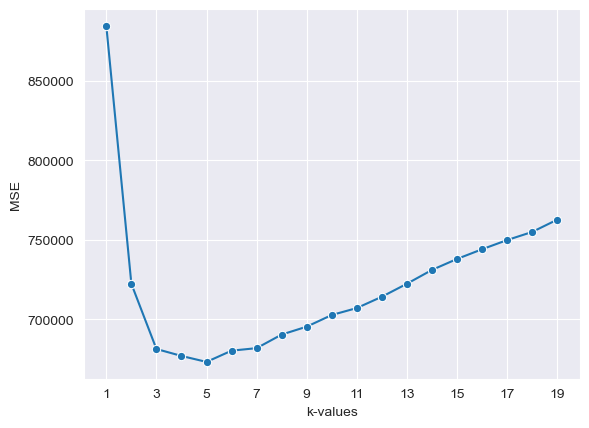

In [83]:
# Perform cross-validation for each value of k
# Create a range of k values for hyperparameter tuning
k_values = range(1, 20)

# List to store mean squared errors for each value of k
mse_values = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    mse = -cross_val_score(knn_regressor, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_values.append(np.mean(mse))

# Visualize MSE
sns.lineplot(x = k_values, y = mse_values, marker = 'o')
plt.xlabel("k-values")
plt.ylabel("MSE")
plt.xticks(range(1, 21, 2))
plt.show()

In [84]:
# Create and train a model with an optimal k-value

# Find an optimal k from the array mse_values
smallest_mse = np.min(mse_values)
best_k = mse_values.index(smallest_mse)+1

# Implement and fit the model
knn_regressor = KNeighborsRegressor(n_neighbors=best_k)
knn_regressor.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [85]:
# Evaluate the model's performance on the train dataset
y_hat_train = knn_regressor.predict(X_train_scaled)

mse_train = mean_squared_error(y_train, y_hat_train)
rmse_train = mean_squared_error(y_train, y_hat_train, squared=False)
mae_train = mean_absolute_error(y_train, y_hat_train)
r2_train = knn_regressor.score(X_train_scaled, y_train)
r2_adj_test = 1-(1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train_scaled.shape[1]-1)

print(f"MSE train: {int(np.round(mse_train))}")
print(f"RMSE train: {int(np.round(rmse_train))}")
print(f"MAE train: {int(np.round(mae_train))}")
print(f"R2 train: {np.round(r2_train*100, 2)}%") 
print(f"Adj_R2 train: {np.round(r2_adj_train*100, 2)}%")

MSE train: 402475
RMSE train: 634
MAE train: 322
R2 train: 97.46%
Adj_R2 train: 89.4%


In [86]:
# Evaluate the model's performance on the test dataset
y_hat_test = knn_regressor.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_hat_test)
rmse_test = mean_squared_error(y_test, y_hat_test, squared=False)
mae_test = mean_absolute_error(y_test, y_hat_test)
r2_test = knn_regressor.score(X_test_scaled, y_test)
r2_adj_test = 1-(1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)

print(f"MSE test: {int(np.round(mse_test))}")
print(f"RMSE test: {int(np.round(rmse_test))}")
print(f"MAE test: {int(np.round(mae_test))}")
print(f"R2 test: {np.round(r2_test*100, 2)}%") 
print(f"Adj_R2 test: {np.round(r2_adj_test*100, 2)}%")

MSE test: 674703
RMSE test: 821
MAE test: 413
R2 test: 95.75%
Adj_R2 test: 95.74%


<mark><u>**Insights**<u></mark>: The model has already have a high performance, but GridSearchCV might help further improve the model's performance through hyperparameters tuning.

In [87]:
# GridSearchCV for hyperparameter tuning
param_grid_knn = {
    'n_neighbors': range(3, 11, 2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid_knn, scoring='r2', cv=5)
grid_search.fit(X_train_scaled, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {np.round(best_r2_score*100, 2)}%")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
y_hat_test = best_model.predict(X_test_scaled)
r2_test = knn.score(X_test_scaled, y_test)
print(f"R2 score on test set: {np.round(r2_test*100, 2)}%")

Best R2 score: 96.47%
Best hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
R2 score on test set: 95.75%


In [88]:
knn = KNeighborsRegressor(**best_params)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=7, p=1, weights='distance')

In [89]:
y_hat_test = knn.predict(X_test_scaled)
r2_test = r2_score(y_test, y_hat_test)

print(f"R2 test: {np.round(r2_test*100, 2)}%") 

R2 test: 96.35%


<mark><u>**Insights**<u></mark>: Tuning of hyperparameters improved R2 score on the test dataset. In terms of performance, kNN model has beaten the baseline model. 

#### 7.3. Decision Tree Regression

In [90]:
# Learn from the training data
dt = DecisionTreeRegressor()
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [91]:
# Evaluate the model's performance on the train dataset
y_hat_train = dt.predict(X_train_scaled)

mse_train = mean_squared_error(y_train, y_hat_train)
rmse_train = mean_squared_error(y_train, y_hat_train, squared=False)
mae_train = mean_absolute_error(y_train, y_hat_train)
r2_train = dt.score(X_train_scaled, y_train)
r2_adj_test = 1-(1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train_scaled.shape[1]-1)

print(f"MSE train: {int(np.round(mse_train))}")
print(f"RMSE train: {int(np.round(rmse_train))}")
print(f"MAE train: {int(np.round(mae_train))}")
print(f"R2 train: {np.round(r2_train*100, 2)}%") 
print(f"Adj_R2 train: {np.round(r2_adj_train*100, 2)}%")

MSE train: 46
RMSE train: 7
MAE train: 0
R2 train: 100.0%
Adj_R2 train: 89.4%


In [92]:
# Evaluate the model's performance on the test dataset
y_hat_test = dt.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_hat_test)
rmse_test = mean_squared_error(y_test, y_hat_test, squared=False)
mae_test = mean_absolute_error(y_test, y_hat_test)
r2_test = dt.score(X_test_scaled, y_test)
r2_adj_test = 1-(1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)

print(f"MSE test: {int(np.round(mse_test))}")
print(f"RMSE test: {int(np.round(rmse_test))}")
print(f"MAE test: {int(np.round(mae_test))}")
print(f"R2 test: {np.round(r2_test*100, 2)}%") 
print(f"Adj_R2 test: {np.round(r2_adj_test*100, 2)}%")

MSE test: 551291
RMSE test: 742
MAE test: 366
R2 test: 96.53%
Adj_R2 test: 96.52%


<mark><u>**Insights**<u></mark>: The model has already have a high performance, but GridSearchCV might help further improve the model's performance through hyperparameters tuning.

In [93]:
# GridSearchCV
cv_scores = cross_val_score(dt, X_train_scaled, y_train, cv=5, scoring='r2')

param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [15, 20, 25, 30, 35],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10]
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid_dt, scoring='r2', cv=5)
grid_search.fit(X_train_scaled, y_train)

best_r2_score = grid_search.best_score_
best_params = grid_search.best_params_
print(f"Best R2 score: {np.round(best_r2_score*100, 2)}%")
print(f"Best hyperparameters: {best_params}")

best_model = grid_search.best_estimator_
y_hat_test = best_model.predict(X_test_scaled)
r2_test = dt.score(X_test_scaled, y_test)
print(f"R2 score on test set: {np.round(r2_test*100, 2)}%")

Best R2 score: 97.48%
Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 35}
R2 score on test set: 96.53%


In [94]:
dt = DecisionTreeRegressor(**best_params)
dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_split=35)

In [95]:
y_hat_test = dt.predict(X_test_scaled)
r2_test = r2_score(y_test, y_hat_test)

print(f"R2 test: {np.round(r2_test*100, 2)}%") 

R2 test: 97.52%


<mark><u>**Insights**<u></mark>: Tuning of hyperparameters improved R2 score on the test dataset. In terms of performance, Decision tree model has beaten the kNN model. 

#### 7.4. Random Forest Regression

In [96]:
# Learn from the training data
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [97]:
# Evaluate the model's performance on the train dataset
y_hat_train = rf.predict(X_train_scaled)

mse_train = mean_squared_error(y_train, y_hat_train)
rmse_train = mean_squared_error(y_train, y_hat_train, squared=False)
mae_train = mean_absolute_error(y_train, y_hat_train)
r2_train = rf.score(X_train_scaled, y_train)
r2_adj_test = 1-(1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train_scaled.shape[1]-1)

print(f"MSE train: {int(np.round(mse_train))}")
print(f"RMSE train: {int(np.round(rmse_train))}")
print(f"MAE train: {int(np.round(mae_train))}")
print(f"R2 train: {np.round(r2_train*100, 2)}%") 
print(f"Adj_R2 train: {np.round(r2_adj_train*100, 2)}%")

MSE train: 41190
RMSE train: 203
MAE train: 100
R2 train: 99.74%
Adj_R2 train: 89.4%


In [98]:
# Evaluate the model's performance on the test dataset
y_hat_test = rf.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_hat_test)
rmse_test = mean_squared_error(y_test, y_hat_test, squared=False)
mae_test = mean_absolute_error(y_test, y_hat_test)
r2_test = rf.score(X_test_scaled, y_test)
r2_adj_test = 1-(1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)

print(f"MSE test: {int(np.round(mse_test))}")
print(f"RMSE test: {int(np.round(rmse_test))}")
print(f"MAE test: {int(np.round(mae_test))}")
print(f"R2 test: {np.round(r2_test*100, 2)}%") 
print(f"Adj_R2 test: {np.round(r2_adj_test*100, 2)}%")

MSE test: 310739
RMSE test: 557
MAE test: 277
R2 test: 98.04%
Adj_R2 test: 98.04%


<mark><u>**Insights**<u></mark>: In terms of performance, Random forest model has beaten Decision Tree model.

#### 7.5. XGBoost Regressor

In [99]:
# Learn from the training data
xr = XGBRegressor()
xr.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [100]:
# Evaluate the model's performance on the train dataset
y_hat_train = xr.predict(X_train_scaled)

mse_train = mean_squared_error(y_train, y_hat_train)
rmse_train = mean_squared_error(y_train, y_hat_train, squared=False)
mae_train = mean_absolute_error(y_train, y_hat_train)
r2_train = xr.score(X_train_scaled, y_train)
r2_adj_test = 1-(1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train_scaled.shape[1]-1)

print(f"MSE train: {int(np.round(mse_train))}")
print(f"RMSE train: {int(np.round(rmse_train))}")
print(f"MAE train: {int(np.round(mae_train))}")
print(f"R2 train: {np.round(r2_train*100, 2)}%") 
print(f"Adj_R2 train: {np.round(r2_adj_train*100, 2)}%")

MSE train: 153048
RMSE train: 391
MAE train: 223
R2 train: 99.03%
Adj_R2 train: 89.4%


In [101]:
# Evaluate the model's performance on the test dataset
y_hat_test = xr.predict(X_test_scaled)

mse_test = mean_squared_error(y_test, y_hat_test)
rmse_test = mean_squared_error(y_test, y_hat_test, squared=False)
mae_test = mean_absolute_error(y_test, y_hat_test)
r2_test = xr.score(X_test_scaled, y_test)
r2_adj_test = 1-(1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test_scaled.shape[1]-1)

print(f"MSE test: {int(np.round(mse_test))}")
print(f"RMSE test: {int(np.round(rmse_test))}")
print(f"MAE test: {int(np.round(mae_test))}")
print(f"R2 test: {np.round(r2_test*100, 2)}%") 
print(f"Adj_R2 test: {np.round(r2_adj_test*100, 2)}%")

MSE test: 299623
RMSE test: 547
MAE test: 282
R2 test: 98.11%
Adj_R2 test: 98.11%


<mark><u>**Insights**<u></mark>: In terms of performance, XGBoost model has beaten Random Forest model.

## 8. Final Conclusion

In [102]:
# Summary results for all models
print("Summary of results - R2 test:")
print(f"     Linear Regression: {np.round(lr.score(X_test_scaled, y_test)*100, 2)}%")
print(f"     kNN Regression: {np.round(knn.score(X_test_scaled, y_test)*100, 2)}%")
print(f"     Decision Tree Regression: {np.round(dt.score(X_test_scaled, y_test)*100, 2)}%") 
print(f"     Random Forest Regression: {np.round(rf.score(X_test_scaled, y_test)*100, 2)}%") 
print(f"     XGBoost: {np.round(xr.score(X_test_scaled, y_test)*100, 2)}%") 

Summary of results - R2 test:
     Linear Regression: 88.95%
     kNN Regression: 96.35%
     Decision Tree Regression: 97.52%
     Random Forest Regression: 98.04%
     XGBoost: 98.11%


<mark><u>**Insights**<u></mark>: In terms of performance, XGBoost model has beaten all other models.